In [2]:
%reload_ext autoreload
%autoreload 2

from viz_funcs import *

import os
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from tqdm import tqdm

pd.options.display.max_columns = 150

%matplotlib inline


/home/christiana/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/christiana/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
folders = ['fig1', 'fig3', 'fig5', 'fig6', 'fig7', 'fig8', 'fig9', 'S1', 'S2', 'S3', 'S4','S6']
for folder in folders:
    if not os.path.exists('viz/'+folder):
        os.makedirs('viz/'+folder)

# Phytochemical Diversity of Commercial *Cannabis*

Coded by Christiana J Smith

Please note that the code for some supplemental figures will not run. We have only included the common core cannabinoids and terpenes in the dataset, and have not included lab ids. This is to anonymize the lab data. The data underlying the supplemental figure results are available upon request, with consent from each individual lab.

## Load Data

In [7]:
lab_df = pd.read_csv('data/preproc_lab_data_pub_20220218_nl.csv',
                     dtype={'anon_producer':str})
strain_info = pd.read_csv('data/strain_info_pub_20210915.csv')

In [8]:
lab_df.head()

u_id strain_slug anon_producer product_category strain_category  \
0     0         NaN          1046           FLOWER            None   
1     1         NaN          1046           FLOWER            None   
2     2         NaN          1046           FLOWER            None   
3     3         NaN          1046           FLOWER            None   
4     4         NaN          1046           FLOWER            None   

   strain_popularity chemotype  has_cannabs  chemotype_ratio    tot_thc  \
0                NaN   THC-Dom         True       425.819531  20.103098   
1                NaN   THC-Dom         True       207.384250  17.775078   
2                NaN   THC-Dom         True       230.122927  18.196924   
3                NaN   THC-Dom         True       321.904704  19.302718   
4                NaN   THC-Dom         True       253.209507  18.224250   

    tot_cbd   tot_cbg   tot_cbc  tot_cbn  tot_thcv  has_terps  total_terps  \
0  0.047210  1.097430  0.000000      0.0  0.255775       True     2.042793   
1  0.085711  0.904467  0.046734      0.0  0.050000       True     1.802569   
2  0.079075  0.923358  0.056123      0.0  0.050000       True     1.657769   
3  0.059964  0.517679  0.034465      0.0  0.050000       True     1.247020   
4  0.071973  0.966903  0.000000      0.0  0.231606       True     1.262112   

   terp_var     top_terp_f  tot_ocimene  camphene  g_terpinene  \
0  0.020911  caryophyllene     0.251212      0.01     0.015323   
1  0.015647    tot_ocimene     0.374661      0.01     0.015079   
2  0.013292    terpinolene     0.334714      0.01     0.013090   
3  0.013983  caryophyllene     0.010000      0.01     0.010000   
4  0.006794  caryophyllene     0.158674      0.01     0.014013   

   tot_nerolidol_ct  humulene  caryophyllene  limonene  linalool   myrcene  \
0          0.010000  0.217018       0.560682  0.159195  0.032776  0.177072   
1          0.022216  0.143383       0.315326  0.127196  0.010000  0.199761   
2          0.026730  0.140367       0.306051  0.111072  0.022061  0.177568   
3          0.000000  0.167629       0.385306  0.134872  0.056048  0.368547   
4          0.010000  0.127600       0.317787  0.116072  0.029350  0.099418   

   bisabolol  b_pinene  a_terpinene  terpinolene  a_pinene  
0   0.029597  0.114252     0.010000     0.321310  0.075442  
1   0.010000  0.069859     0.012731     0.365565  0.060920  
2   0.010000  0.057884     0.011981     0.336826  0.049393  
3   0.048849  0.035711     0.000000     0.000000  0.020058  
4   0.010000  0.083642     0.010000     0.179980  0.056437

In [9]:
common_cannabs = ['tot_thc',
                'tot_cbd',
                'tot_cbg',
                'tot_cbc',
                'tot_cbn',
                'tot_thcv']

tot_cannab_cols = ['tot_thc',
'tot_cbd',
'tot_cbg',
'tot_cbc',
'tot_cbn',
# 'tot_cbdv',
# 'tot_cbt',
# 'tot_d8_thc',
'tot_thcv']

lab_df['total_cannabs'] = lab_df.loc[:, tot_cannab_cols].sum(axis=1)

In [10]:
common_terps = ['tot_ocimene', 'camphene', 'g_terpinene', 'tot_nerolidol_ct',
       'humulene', 'caryophyllene', 'limonene', 'linalool', 'myrcene',
       'bisabolol', 'b_pinene', 'a_terpinene', 'terpinolene', 'a_pinene']

In [11]:
terp_df = lab_df[lab_df['has_terps']].copy()
thc_bool = terp_df['chemotype']=='THC-Dom'


## Figure 1: Basic Total Cannab Analysis

### 1A: Violin Plot of All Total Cannab Distributions

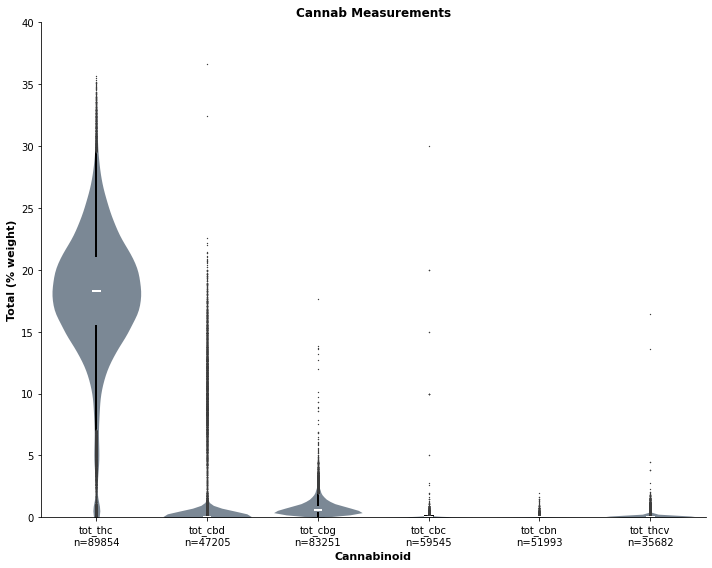

In [8]:
violin_props = {'x': 'Cannab', 'y': 'value', 'ylims':(0,40),
             'cols': common_cannabs, 'order': ['tot_thc', 'tot_cbd', 'tot_cbg', 'tot_cbc', 'tot_cbn', 'tot_thcv'],
             'title': 'Cannab Measurements', 'save_name': 'fig1/1a_violin_cannab-dist',
             'x_label': 'Cannabinoid', 'y_label': 'Total (% weight)',
             'avg': False, 'sig_comp': False, 'figsize':(10,8), 'sample_frac':20000}

run_graph(lab_df,
          **violin_props)

#### S1: Violin Plot of All Total Cannab Distributions by Region

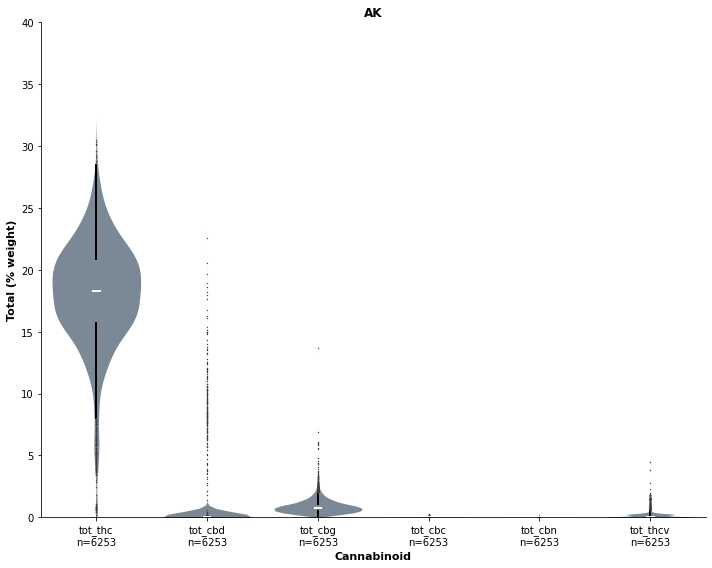

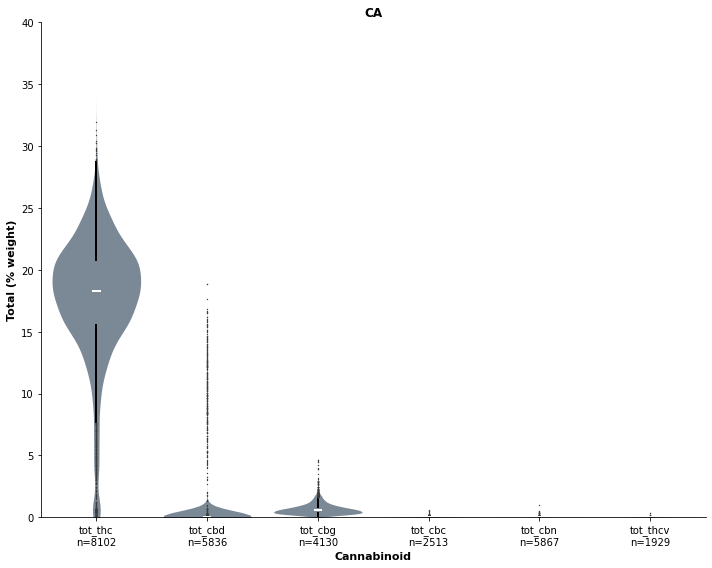

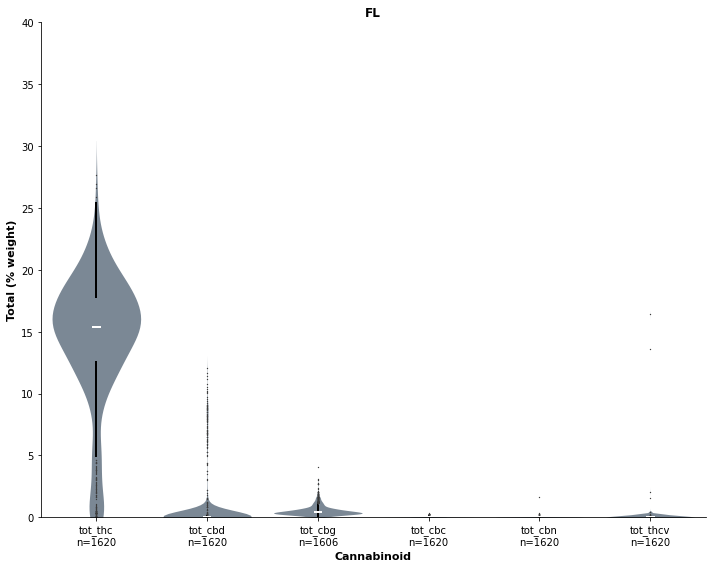

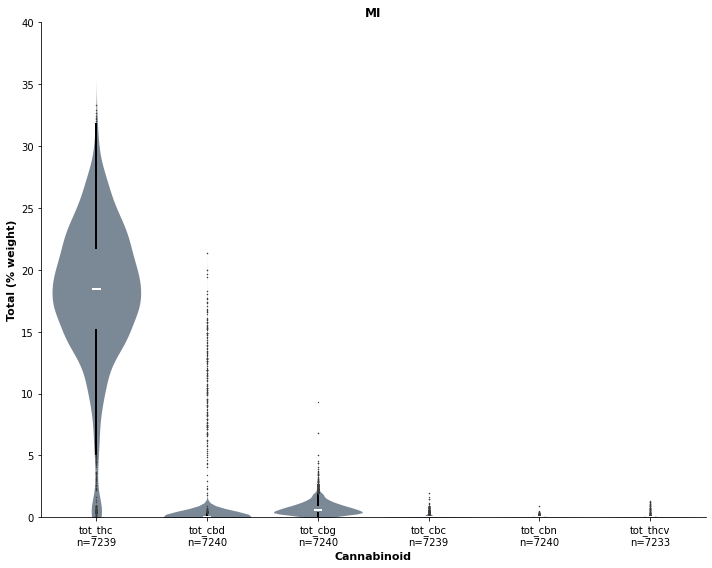

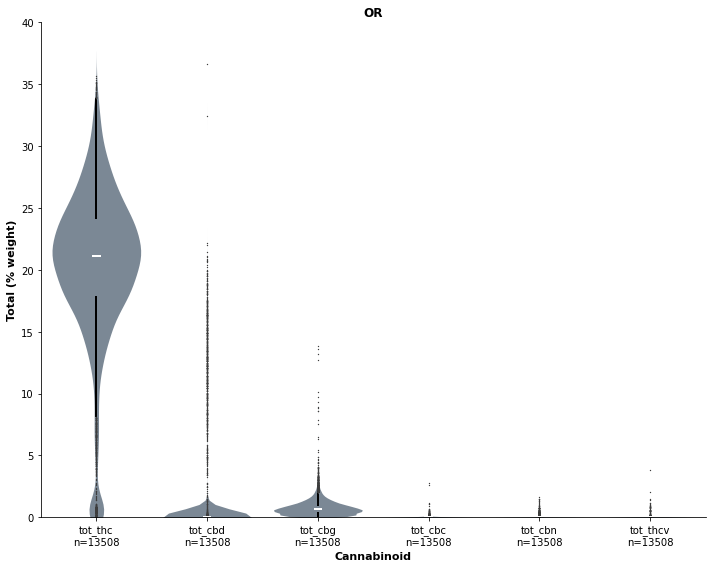

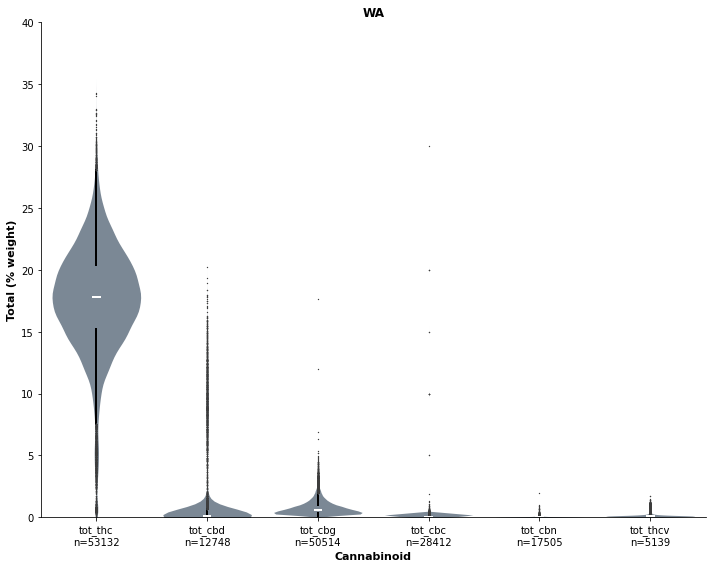

In [7]:
violin_props = {'x': 'Cannab', 'y': 'value', 'ylims':(0,40),
             'cols': tot_cannab_cols, 'order': tot_cannab_cols,
             'title': 'Cannab Measurements by Region', 'save_name': 'S1/S1_violin_cannab-dist',
             'x_label': 'Cannabinoid', 'y_label': 'Total (% weight)',
             'avg': False, 'sig_comp': False, 'figsize':(10,8),
             'groupby': 'region', 'sample_frac':0.5}

run_by_group(lab_df,
            **violin_props)

### 1B: THC/CBD Scatterplot

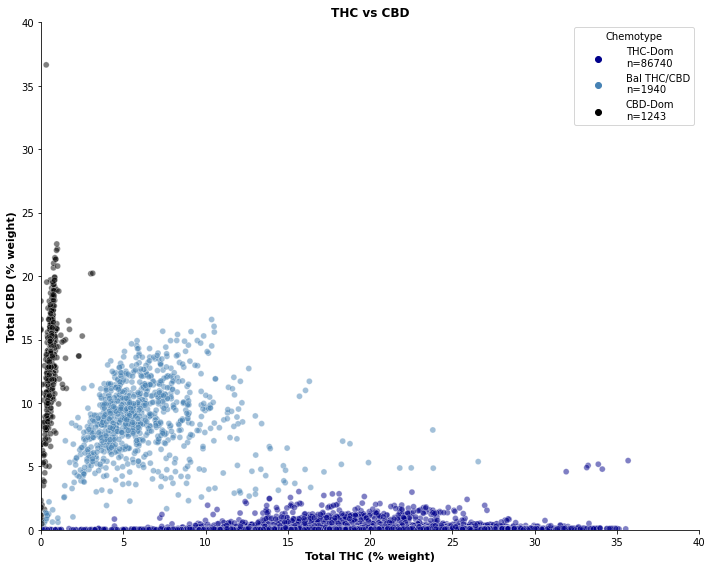

In [10]:
chemotypes = ['THC-Dom', 'Bal THC/CBD', 'CBD-Dom']
ct_palette = {'THC-Dom':'darkblue',
               'Bal THC/CBD': 'steelblue',
               'CBD-Dom': 'black'}

scatter_props = {'x': 'tot_thc', 'y': 'tot_cbd', 'xlims':(0,40), 'ylims':(0,40),
                 'hue': 'chemotype',
                 'palette': ct_palette,
                 'title': 'THC vs CBD', 'save_name': 'fig1/1b_scatter_thc-cbd',
                 'x_label': 'Total THC (% weight)', 'y_label': 'Total CBD (% weight)',
                 'figsize':(10,8), 'sample_frac':20000}

run_graph(lab_df,
          **scatter_props)

#### S2: Scatter Plot of THC vs CBD by Region

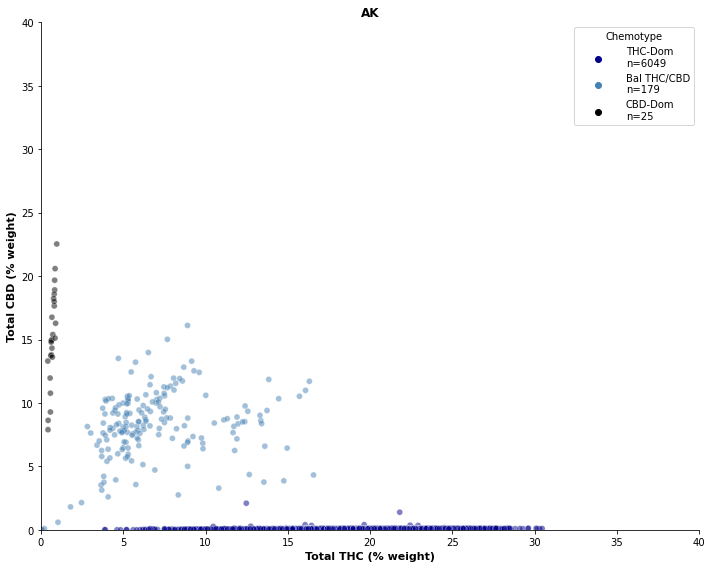

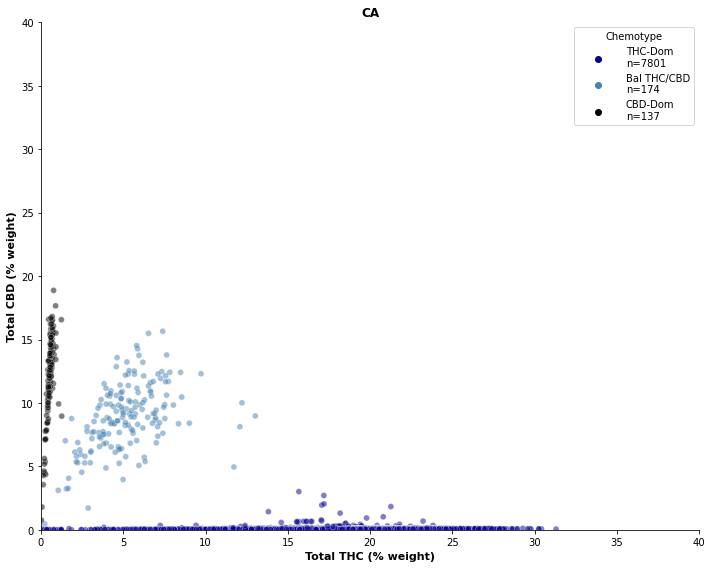

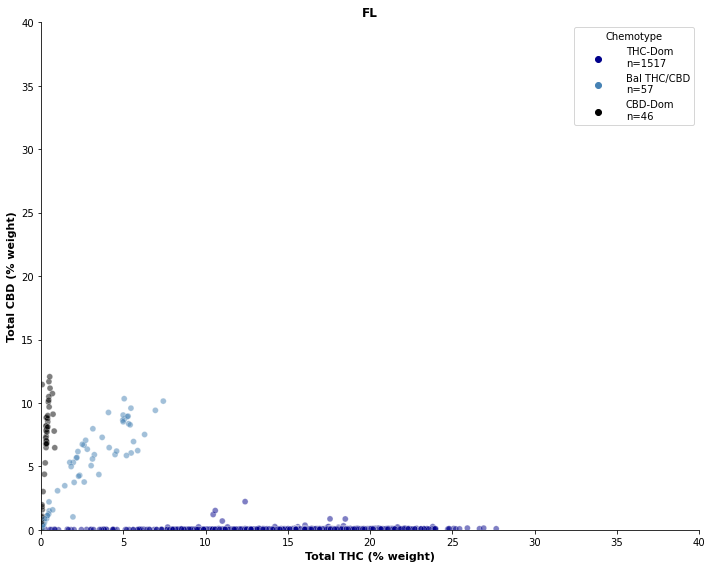

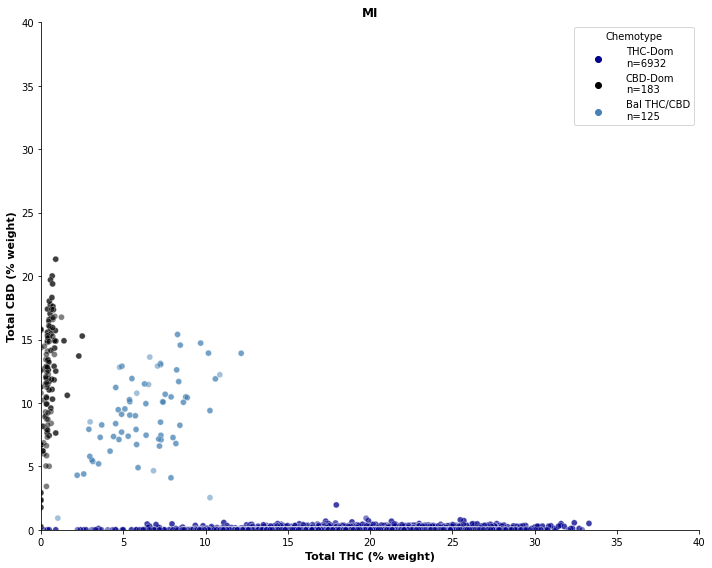

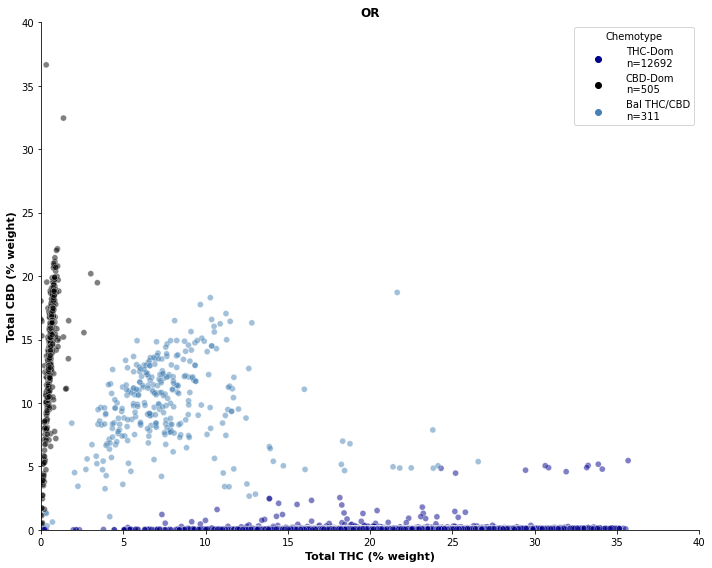

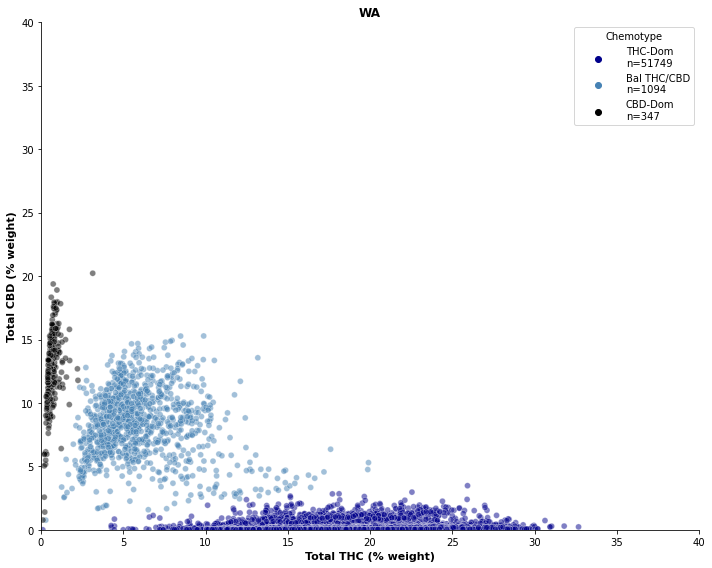

In [11]:
chemotypes = ['THC-Dom', 'Bal THC/CBD', 'CBD-Dom']
ct_palette = {'THC-Dom':'darkblue',
               'Bal THC/CBD': 'steelblue',
               'CBD-Dom': 'black'}

scatter_props = {'x': 'tot_thc', 'y': 'tot_cbd', 'xlims':(0,40), 'ylims':(0,40),
                 'hue': 'chemotype', 'hue_order': chemotypes,
                 'palette': ct_palette,
                 'title': 'THC vs CBD by Region', 'save_name': 'S2/S2_scatter_thc-cbd',
                 'x_label': 'Total THC (% weight)', 'y_label': 'Total CBD (% weight)',
                 'figsize':(10,8), 'sample_frac':1, 'groupby': 'region'}

run_by_group(lab_df,
          **scatter_props)

### 1C: THC/CBD Histogram

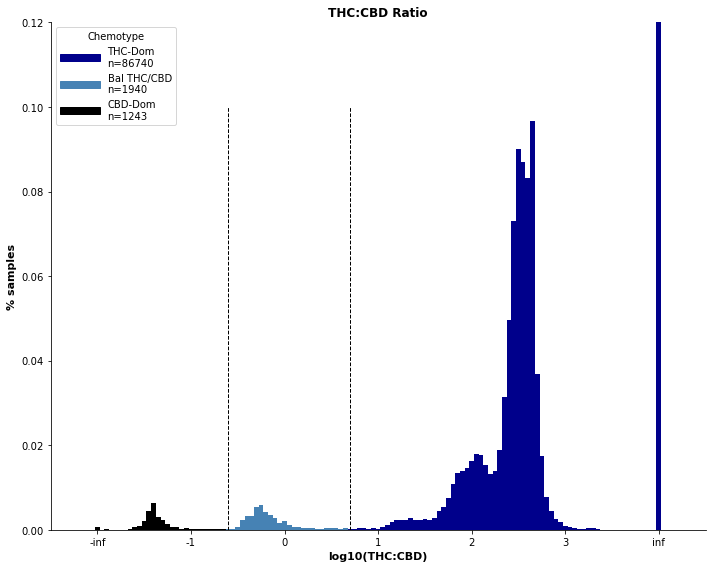

In [12]:
hist_props = {'x': 'thc', 'y': 'cbd', 'xlims':(-2.5,4.5), 'ylims':(0, .12),
             'hue': 'chemotype', 'hue_order': chemotypes,
             'palette': ct_palette,
             'title': 'THC:CBD Ratio', 'save_name': 'fig1/1c_hist_thc-cbd',
             'x_label': 'log10(THC:CBD)', 'y_label': '% samples',
             'figsize':(10,8), 'sample_frac':.5}

run_graph(lab_df,
          **hist_props)

### 1D: PCA Scatter plot + Loadings of Cannab data

In [13]:
chemotypes = ['THC-Dom', 'Bal THC/CBD', 'CBD-Dom']
ct_palette = {'THC-Dom':'darkblue',
               'Bal THC/CBD': 'steelblue',
               'CBD-Dom': 'black'}
 
df_norm, arr, model = run_pca(lab_df, common_cannabs, norm=True, n_components=3, max_min_arr=False)

components = model.components_[[0,1,2],:]
comp_df = pd.DataFrame(components.T, columns=[0,1,2], index=common_cannabs)


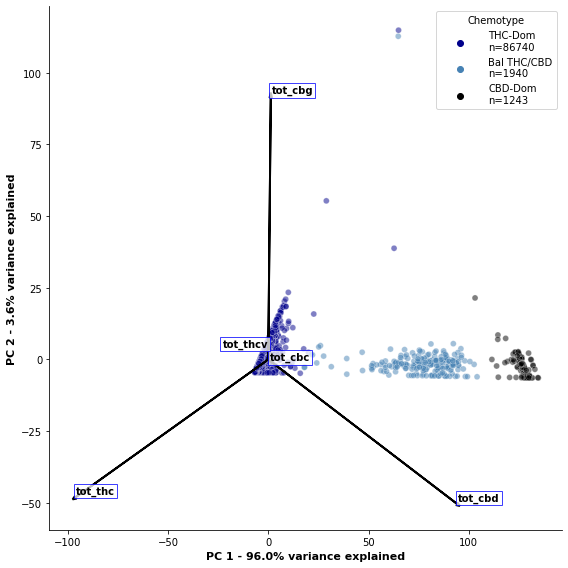

In [14]:
A = 0
B = 1

scatter_props = {'x': A, 'y': B,
                 'hue': 'chemotype', 'sort_list': chemotypes,
                 'palette': ct_palette,
                 'title': '', 'save_name': 'fig1/1d_scatter_pca',
                 'figsize':(8,8), 'sample_frac':10000,
                'comp_df': comp_df, 'n_display': 5}

pc1_var = model.explained_variance_ratio_[A]
pc2_var = model.explained_variance_ratio_[B]

scatter_props['x_label'] = 'PC '+str(A+1)+' - '+str(round(pc1_var*100,1))+'% variance explained'
scatter_props['y_label'] = 'PC '+str(B+1)+' - '+str(round(pc2_var*100,1))+'% variance explained'


run_graph(df_norm,
          **scatter_props)

## Figure 2: Cannab Correlations

See `figs_2_4_7.ipynb`

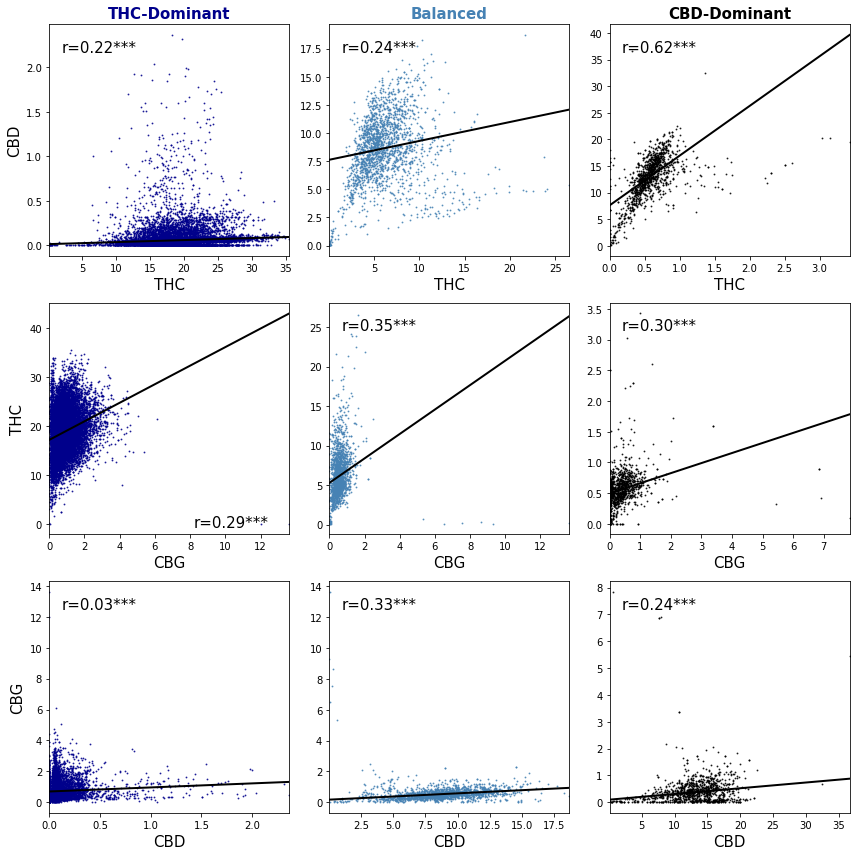

In [8]:
f,axs = plt.subplots(3,3,figsize=(12,12))

_lowess = False
_robust = True
_ci = 0 
_size = 3

# THC-Dom
_df = lab_df[['tot_thc','tot_cbd','tot_cbg','chemotype']].query("chemotype=='THC-Dom'")# & tot_cbg < 5 & tot_cbd < 20")
_df_samp = _df.sample(n=20000)
sns.regplot(x='tot_thc',y='tot_cbd',data=_df_samp,marker='.',color='darkblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[0,0])
sns.regplot(x='tot_cbg',y='tot_thc',data=_df_samp,marker='.',color='darkblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[1,0])
sns.regplot(x='tot_cbd',y='tot_cbg',data=_df_samp,marker='.',color='darkblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[2,0])

axs[0,0].text(0.05,0.9,spearman_sig_string(_df['tot_thc'],_df['tot_cbd']),ha='left',va='center',transform=axs[0,0].transAxes,fontsize=15)
axs[1,0].text(0.6,0.05,spearman_sig_string(_df['tot_cbg'],_df['tot_thc']),ha='left',va='center',transform=axs[1,0].transAxes,fontsize=15)
axs[2,0].text(0.05,0.9,spearman_sig_string(_df['tot_cbd'],_df['tot_cbg']),ha='left',va='center',transform=axs[2,0].transAxes,fontsize=15)

# Balanced
_df = lab_df[['tot_thc','tot_cbd','tot_cbg','chemotype']].query("chemotype=='Bal THC/CBD'")# & tot_cbg < 5 & tot_cbd < 20")
_df_samp = _df.sample(frac=1)
sns.regplot(x='tot_thc',y='tot_cbd',data=_df,marker='.',color='steelblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[0,1])
sns.regplot(x='tot_cbg',y='tot_thc',data=_df,marker='.',color='steelblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[1,1])
sns.regplot(x='tot_cbd',y='tot_cbg',data=_df,marker='.',color='steelblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[2,1])

axs[0,1].text(0.05,0.9,spearman_sig_string(_df['tot_thc'],_df['tot_cbd']),ha='left',va='center',transform=axs[0,1].transAxes,fontsize=15)
axs[1,1].text(0.05,0.9,spearman_sig_string(_df['tot_cbg'],_df['tot_thc']),ha='left',va='center',transform=axs[1,1].transAxes,fontsize=15)
axs[2,1].text(0.05,0.9,spearman_sig_string(_df['tot_cbd'],_df['tot_cbg']),ha='left',va='center',transform=axs[2,1].transAxes,fontsize=15)

# CBD-Dom
_df = lab_df[['tot_thc','tot_cbd','tot_cbg','chemotype']].query("chemotype=='CBD-Dom'")# & tot_cbg < 5 & tot_cbd < 20")
_df_samp = _df.sample(frac=1)
sns.regplot(x='tot_thc',y='tot_cbd',data=_df,marker='.',color='black',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[0,2])
sns.regplot(x='tot_cbg',y='tot_thc',data=_df,marker='.',color='black',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[1,2])
sns.regplot(x='tot_cbd',y='tot_cbg',data=_df,marker='.',color='black',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[2,2])

axs[0,2].text(0.05,0.9,spearman_sig_string(_df['tot_thc'],_df['tot_cbd']),ha='left',va='center',transform=axs[0,2].transAxes,fontsize=15)
axs[1,2].text(0.05,0.9,spearman_sig_string(_df['tot_cbg'],_df['tot_thc']),ha='left',va='center',transform=axs[1,2].transAxes,fontsize=15)
axs[2,2].text(0.05,0.9,spearman_sig_string(_df['tot_cbd'],_df['tot_cbg']),ha='left',va='center',transform=axs[2,2].transAxes,fontsize=15)

# Label axes
axs[0,0].set_ylabel('CBD',fontsize=15)
axs[1,0].set_ylabel('THC',fontsize=15)
axs[2,0].set_ylabel('CBG',fontsize=15)

axs[2,0].set_xlabel('CBD',fontsize=15)
axs[2,1].set_xlabel('THC',fontsize=15)
axs[2,2].set_xlabel('CBG',fontsize=15)

for ax in axs[0,:]:
    ax.set_xlabel('THC',fontsize=15)
    
for ax in axs[1,:]:
    ax.set_xlabel('CBG',fontsize=15)
    
for ax in axs[2,:]:
    ax.set_xlabel('CBD',fontsize=15)
    
for ax in axs[:,1:].flatten():
    ax.set_ylabel(None)

axs[0,0].set_title('THC-Dominant',color='darkblue',fontsize=15,fontweight='bold')
axs[0,1].set_title('Balanced',color='steelblue',fontsize=15,fontweight='bold')
axs[0,2].set_title('CBD-Dominant',color='black',fontsize=15,fontweight='bold')

f.tight_layout()
f.savefig('cannabinoid_correlation.png',dpi=300)
# f.savefig('cannabinoid_correlation.eps',dpi=300)
# f.savefig('cannabinoid_correlation.pdf',dpi=300)

## Figure 3: Basic Terpene Analysis

### 3A: Violin Plot of Common Terps

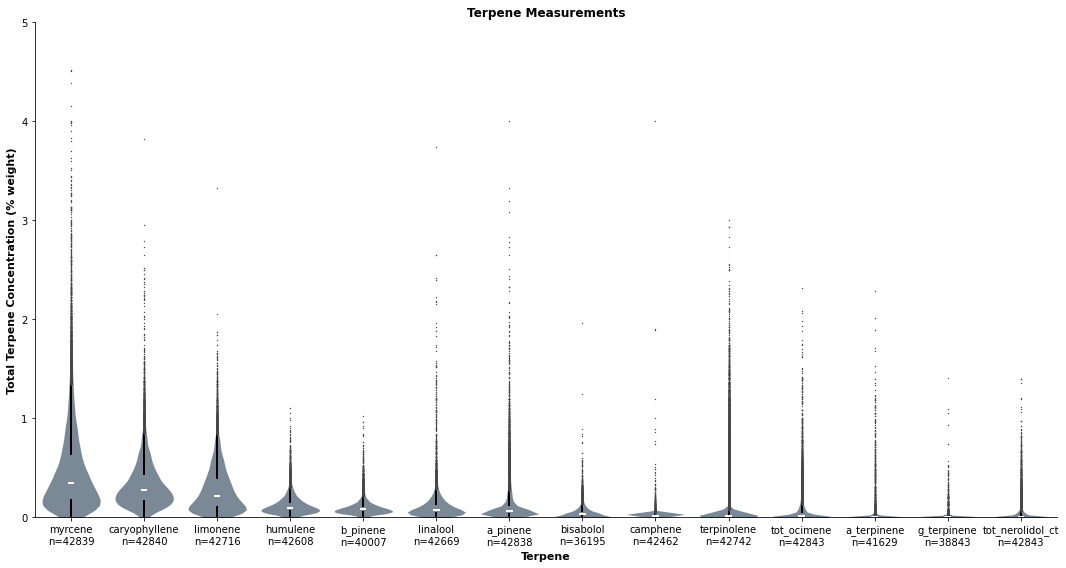

In [15]:
violin_props = {'x': 'Terpene', 'y': 'value', 'ylims':(0,5),
             'cols': common_terps,
             'title': 'Terpene Measurements', 'save_name': 'fig3/3a_violin_terp-dist',
             'x_label': 'Terpene', 'y_label': 'Total Terpene Concentration (% weight)',
             'avg': False, 'sig_comp': False,
             'figsize':(15,8), 'sample_frac':20000}

run_graph(terp_df,
          **violin_props)

In [16]:
scs.spearmanr(terp_df['total_terps'], terp_df['total_cannabs'])

SpearmanrResult(correlation=0.3748877687790203, pvalue=0.0)

#### S3: Terpene Distributions by Region

Please note that the code for S3 will not run as we have only included the common core terpenes in the dataset. The data underlying the results for Fig S3 are available upon request, with consent from each individual lab.

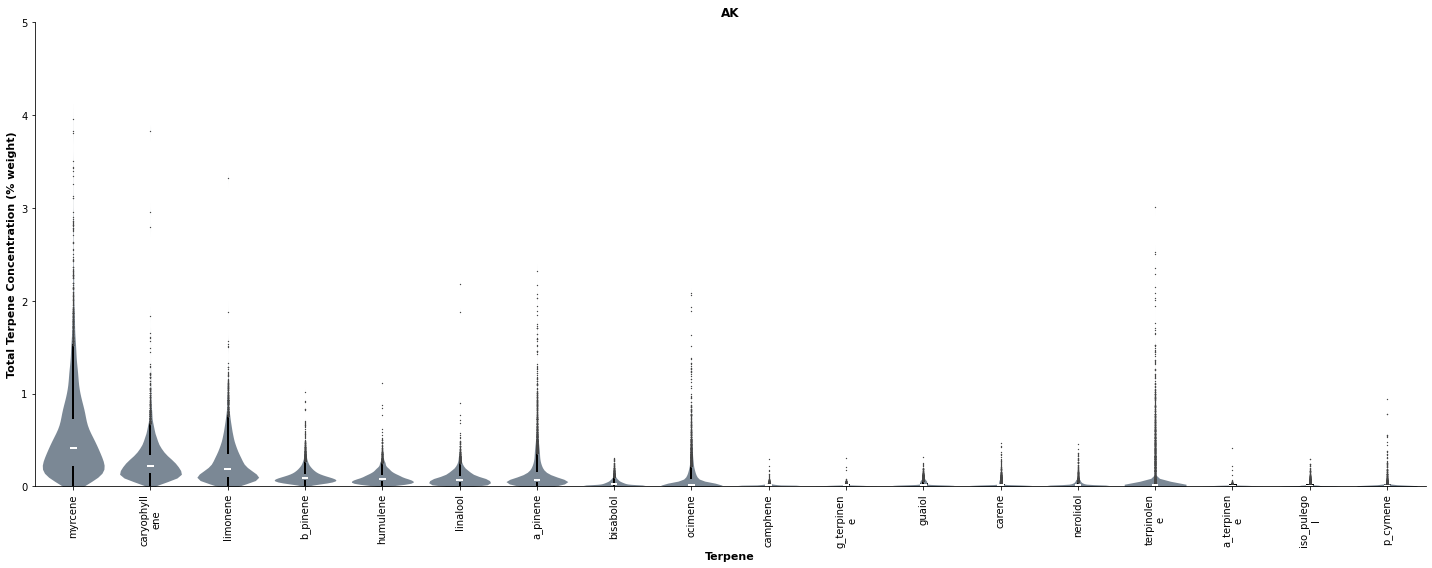

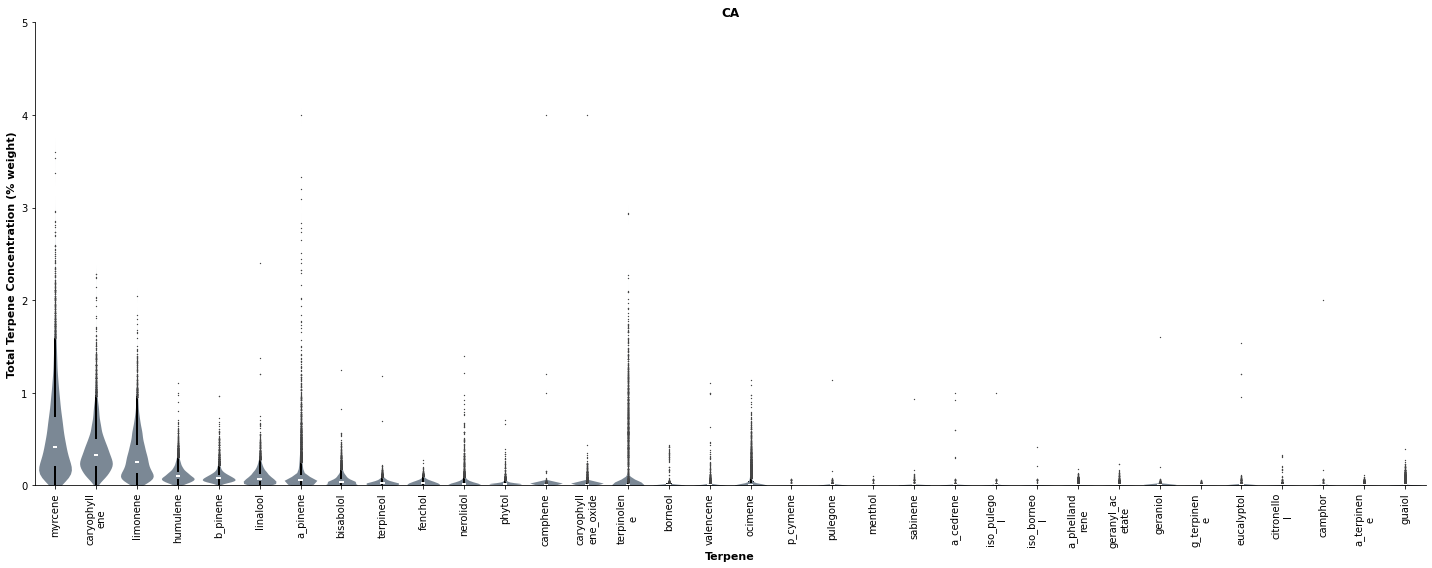

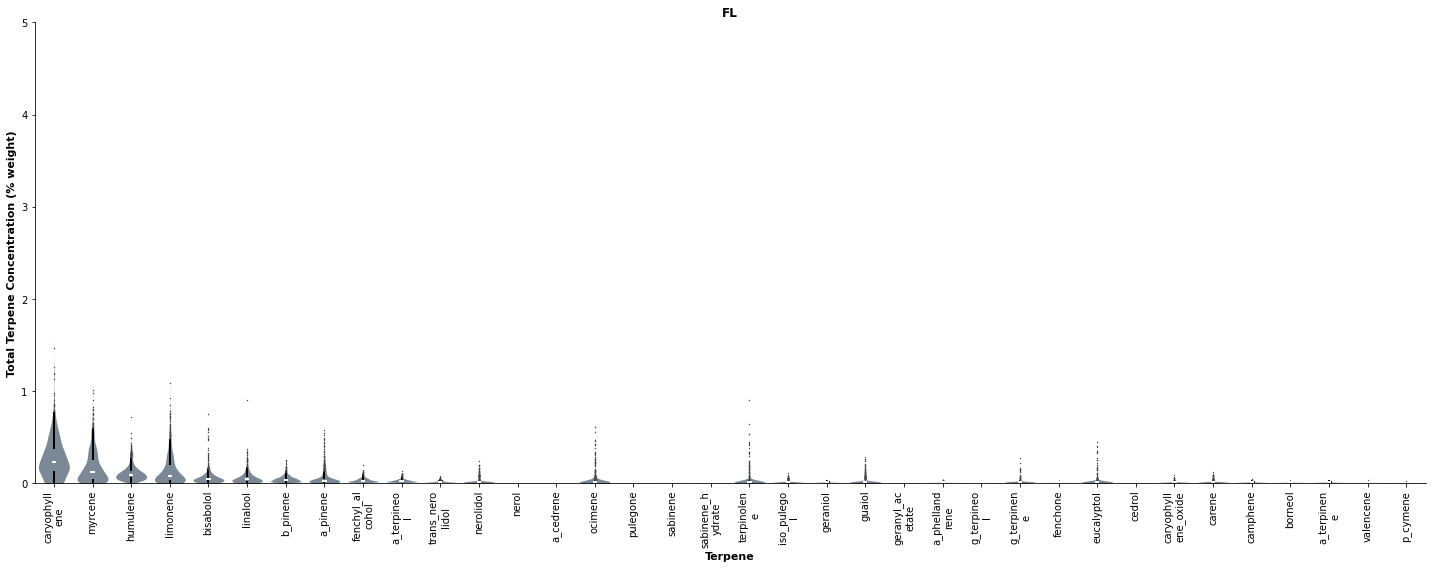

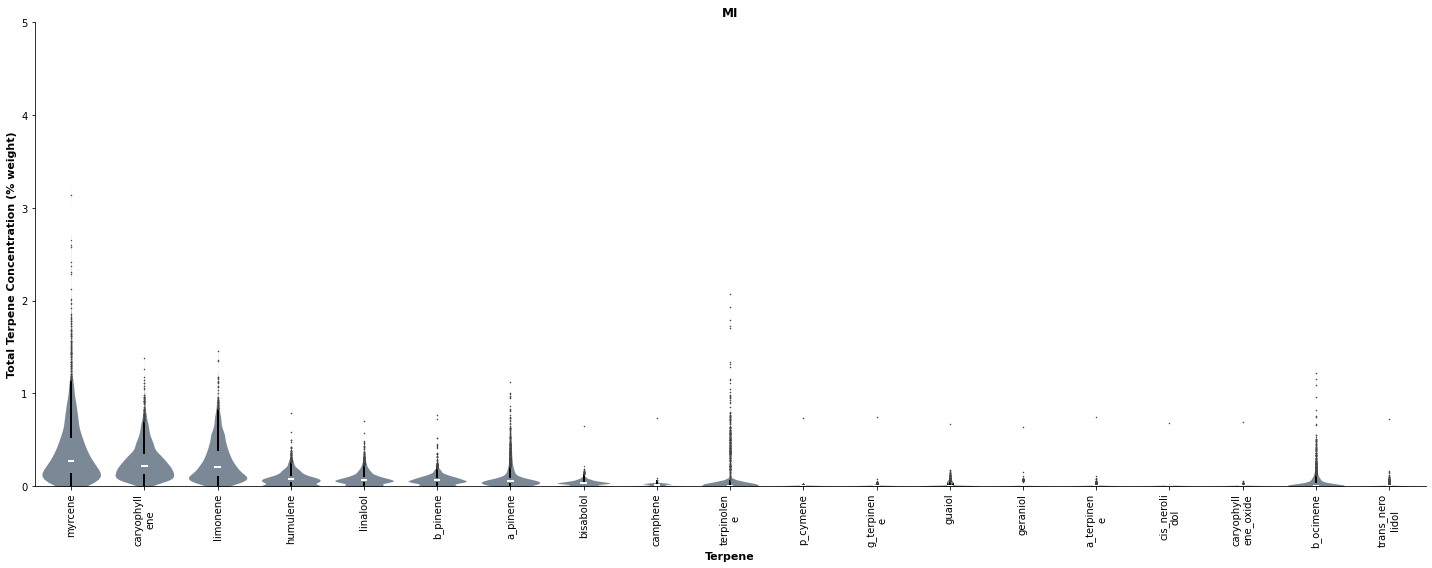

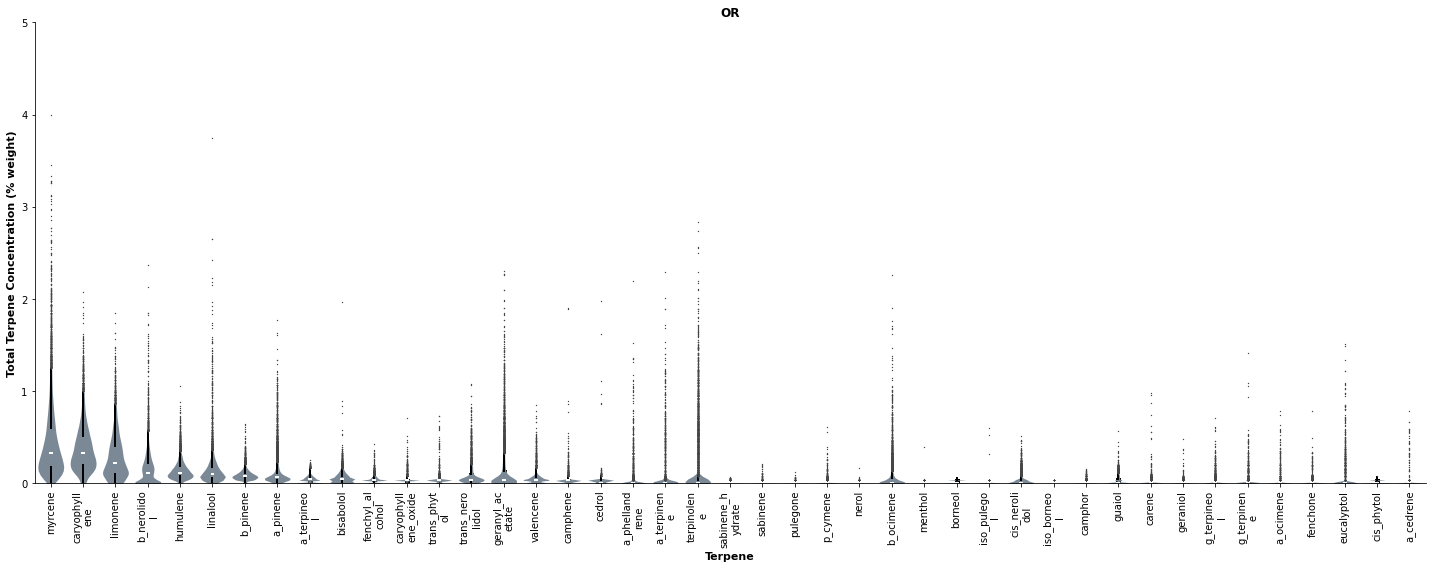

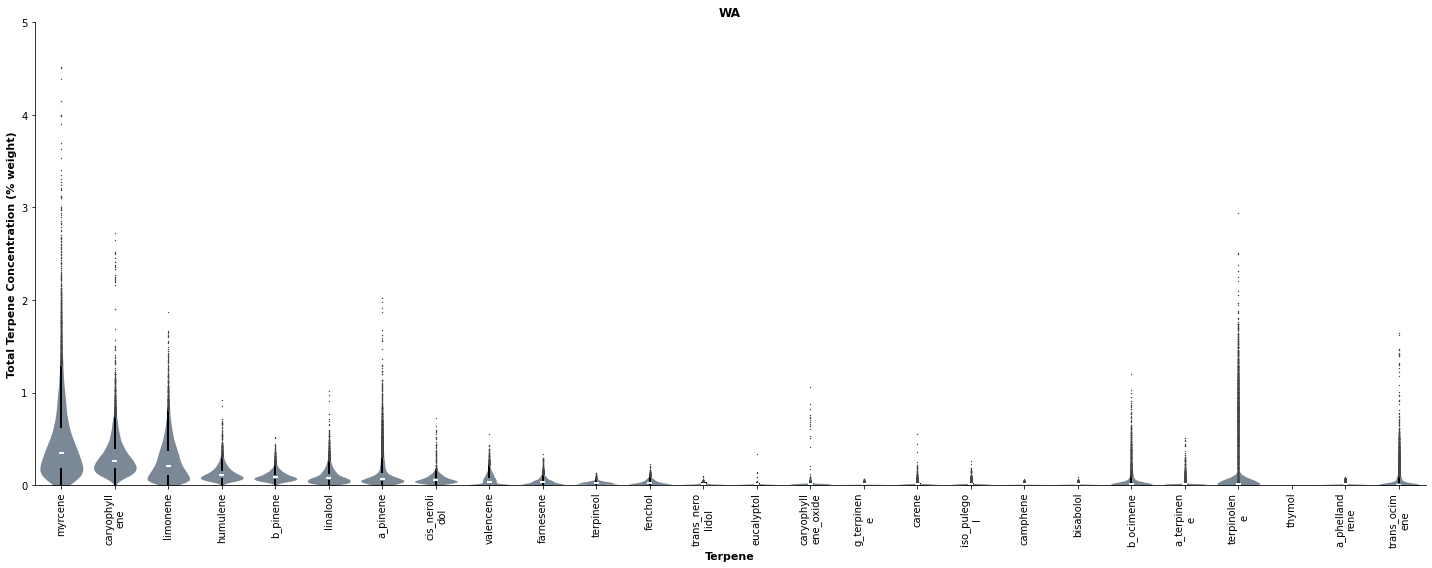

In [17]:
violin_props = {'x': 'Terpene', 'y': 'value', 'ylims':(0,5),
             'cols': all_terps,
             'title': 'Terpene Measurements', 'save_name': 'S3/3a_violin_terp-dist',
             'x_label': 'Terpene', 'y_label': 'Total Terpene Concentration (% weight)',
             'avg': False, 'sig_comp': False,
             'figsize':(20,8), 'sample_frac':1,
               'v_xticklabels':True}

g = terp_df.groupby('region')
base_name = 'S3/3a_violin_terp-dist'

for group, data in g:
    violin_props['title'] = group
    violin_props['save_name'] = base_name+'_'+group
    violin_props['cols'] = np.array(all_terps)[data[all_terps].count()>100]
    run_graph(data, **violin_props)

### 3B-E: Linear Regression Scatter Plots of Common Terps

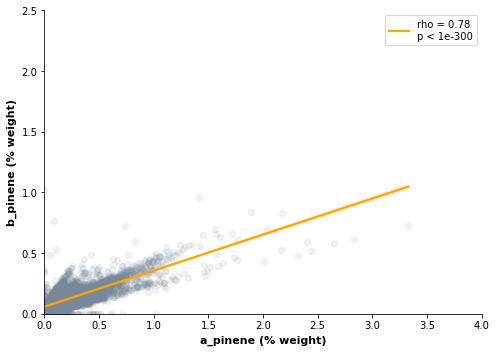

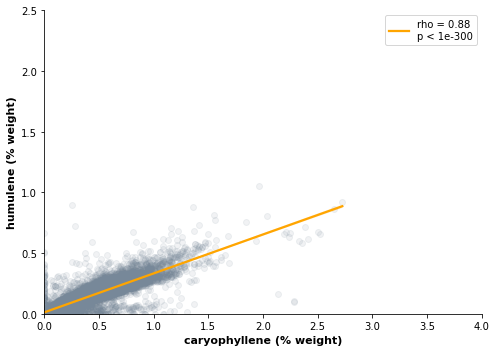

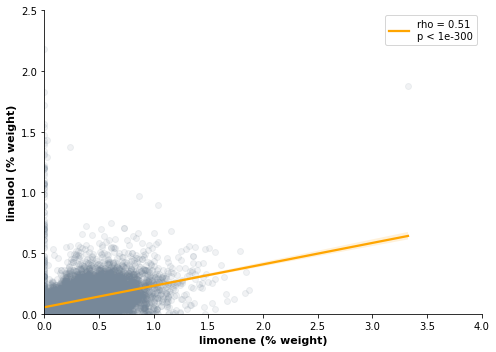

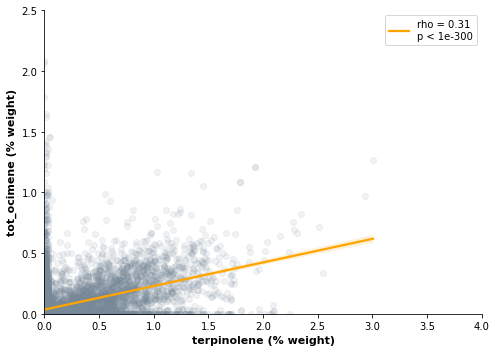

In [18]:
xy_list = [('a_pinene','b_pinene'),('caryophyllene','humulene'),
           ('limonene','linalool'),('terpinolene','tot_ocimene')]

scatter_props = {'xlims':(0,4), 'ylims':(0,2.5),
                 'title': '',
                 'figsize':(7,5), 'sample_frac':20000}

rp_df = pd.DataFrame(index=[x+'-'+y for (x,y) in xy_list], columns=['rho','p_rho'])
for (x, y), idx in zip(xy_list, ['b','c','d','e']):
    scatter_props['x'] = x; scatter_props['y'] = y;
    scatter_props['x_label'] = '{} (% weight)'.format(x)
    scatter_props['y_label'] = '{} (% weight)'.format(y)
    scatter_props['save_name'] = 'fig3/3{}_reg_terps'.format(idx)
    
    run_graph(terp_df,
             **scatter_props)
    
    no_nan = terp_df.dropna(subset=[x,y], how='any')    
    rho, p = scs.spearmanr(no_nan[x], no_nan[y])
    rp_df.loc[x+'-'+y, 'rho'] = rho
    rp_df.loc[x+'-'+y, 'p_rho'] = p

In [19]:
no_nan = terp_df.dropna(subset=['caryophyllene','humulene'], how='any')   
scs.spearmanr(no_nan.loc[:,'caryophyllene'],
              no_nan.loc[:, 'humulene'])

SpearmanrResult(correlation=0.8750233118825677, pvalue=0.0)

In [20]:
print(rp_df)
# rp_df.to_csv('viz/3b-e_reg_terps_stats.csv')

                              rho p_rho
a_pinene-b_pinene        0.776655     0
caryophyllene-humulene   0.875023     0
limonene-linalool        0.512747     0
terpinolene-tot_ocimene  0.306305     0


#### S3: Terpene Linear Regressions by Region

In [9]:
bins = np.array([0, 0.0001, 0.001, 0.01, np.inf])/terp_df['region'].unique().shape[0]
names = ['***', '**', '*', 'n.s.']
# ttest_df['star'] = pd.cut(ttest_df['p_val'].values, bins, labels=names)
# ttest_df['star'] = ttest_df['star'].fillna('***')

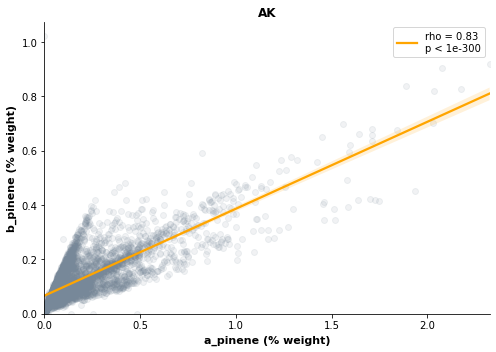

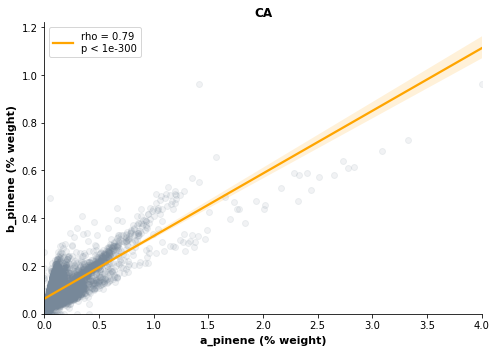

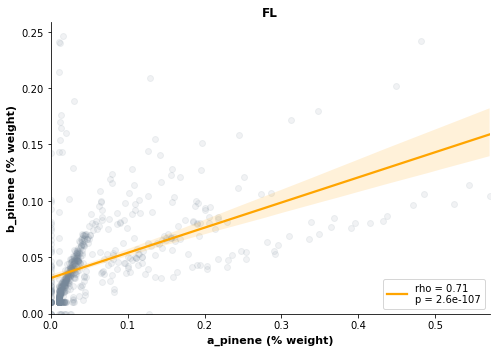

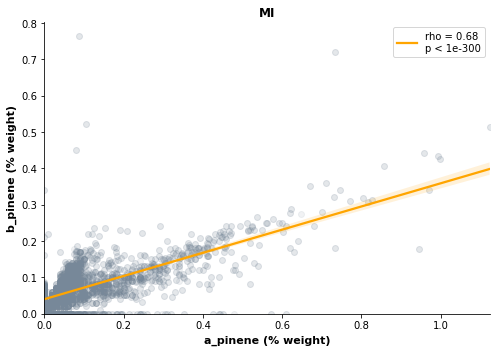

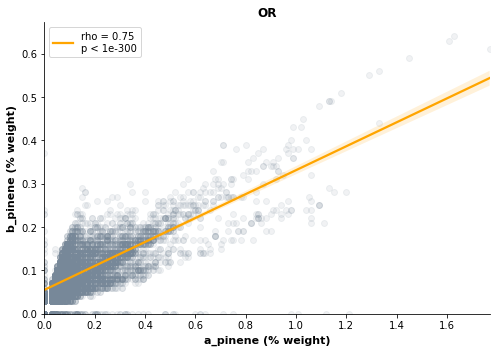

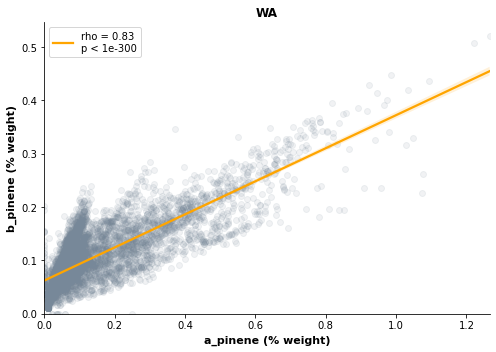

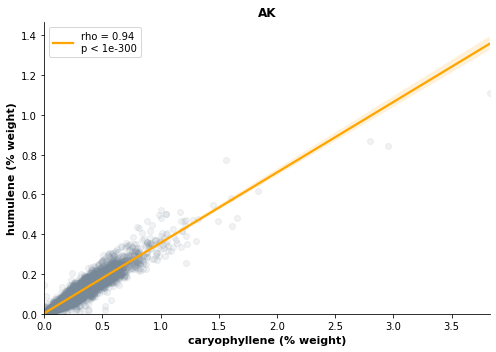

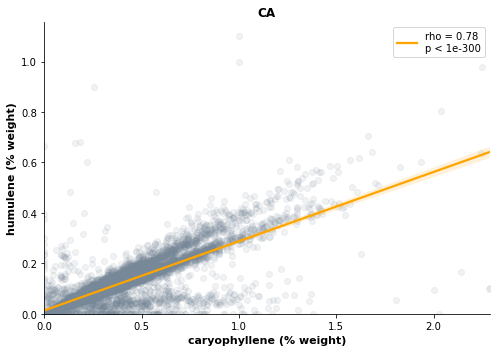

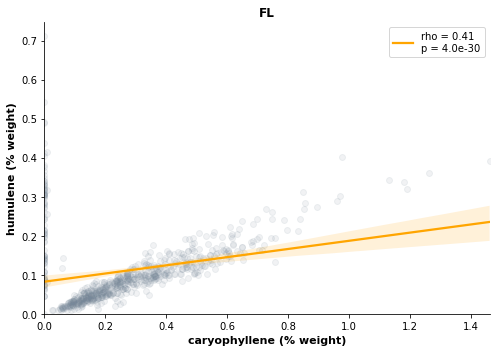

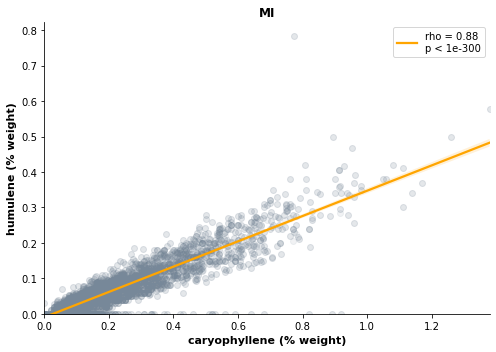

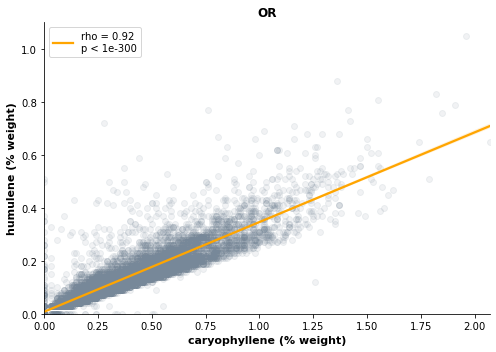

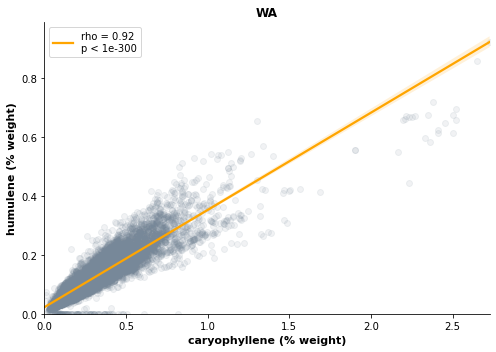

In [21]:
xy_list = [('a_pinene','b_pinene'),('caryophyllene','humulene')]

scatter_props = {
                 'xlims':(0,), 'ylims':(0,),
                 'title': '',
                 'figsize':(7,5), 'sample_frac':1,
                 'groupby': 'region'}

for (x, y), idx in zip(xy_list, ['b','c']):
    scatter_props['x'] = x; scatter_props['y'] = y;
    scatter_props['x_label'] = '{} (% weight)'.format(x)
    scatter_props['y_label'] = '{} (% weight)'.format(y)
    scatter_props['save_name'] = 'S3/{}_reg_terps'.format(idx)
    
    run_by_group(terp_df,
             **scatter_props)
    

## Figure 4: Terpene Co-Occurence

See `figs_2_4_7.ipynb`

## Figure 5: PCA Analysis of Terpenes

### 5A: Bar Plot of Variance Explained

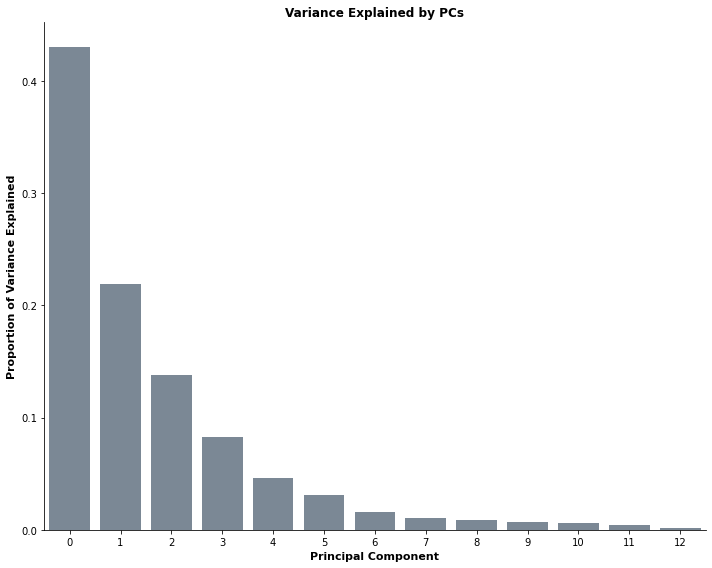

In [22]:
X, arr, model = run_pca(terp_df, common_terps, norm=True, n_components=len(common_terps)-1)
ex_var = model.explained_variance_ratio_

bar_props = {'x': np.array(range(0, len(ex_var))),
             'y': ex_var,
             'title': 'Variance Explained by PCs', 'save_name': 'fig5/5a_bar_var-explained',
             'x_label': 'Principal Component', 'y_label': 'Proportion of Variance Explained',
             'figsize':(10,8)}

run_graph(terp_df,
          **bar_props)

In [37]:
ex_var[:3].sum()

0.7874318046824217

### 5B-D: Scatter plot + Loadings of PCA by Chemotype

In [34]:
terp_df[common_terps].isna()

tot_ocimene  camphene  g_terpinene  tot_nerolidol_ct  humulene  \
0            False     False        False             False     False   
1            False     False        False             False     False   
2            False     False        False             False     False   
3            False     False        False             False     False   
4            False     False        False             False     False   
...            ...       ...          ...               ...       ...   
89916        False      True         True             False     False   
89917        False      True         True             False     False   
89918        False      True         True             False     False   
89919        False      True         True             False     False   
89920        False      True         True             False     False   

       caryophyllene  limonene  linalool  myrcene  bisabolol  b_pinene  \
0              False     False     False    False      False     False   
1              False     False     False    False      False     False   
2              False     False     False    False      False     False   
3              False     False     False    False      False     False   
4              False     False     False    False      False     False   
...              ...       ...       ...      ...        ...       ...   
89916          False     False     False    False      False     False   
89917          False     False     False    False      False     False   
89918          False     False     False    False      False     False   
89919          False     False     False    False      False     False   
89920          False     False     False    False      False     False   

       a_terpinene  terpinolene  a_pinene  
0            False        False     False  
1            False        False     False  
2            False        False     False  
3            False        False     False  
4            False        False     False  
...            ...          ...       ...  
89916         True         True     False  
89917         True         True     False  
89918         True         True     False  
89919         True         True     False  
89920         True         True     False  

[42843 rows x 14 columns]

In [23]:
chemotypes = ['THC-Dom', 'Bal THC/CBD', 'CBD-Dom']
ct_palette = {'THC-Dom':'darkblue',
               'Bal THC/CBD': 'steelblue',
               'CBD-Dom': 'black'}
 
df_norm, arr, model = run_pca(terp_df, common_terps, norm=True, n_components=3, max_min_arr=False)

components = model.components_[[0,1,2],:]
comp_df = pd.DataFrame(components.T, columns=[0,1,2], index=common_terps)


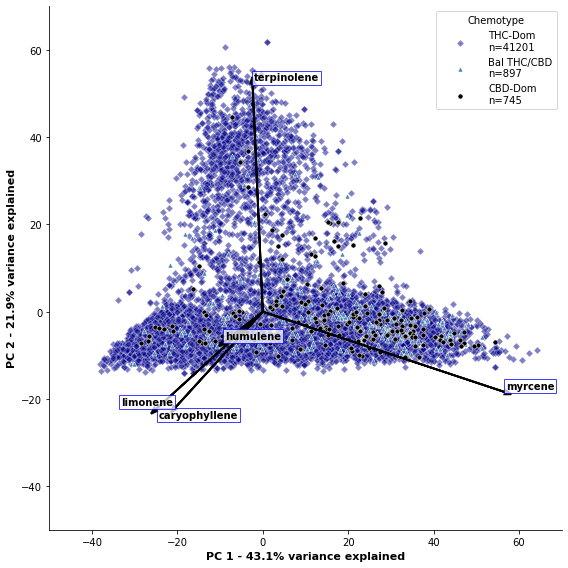

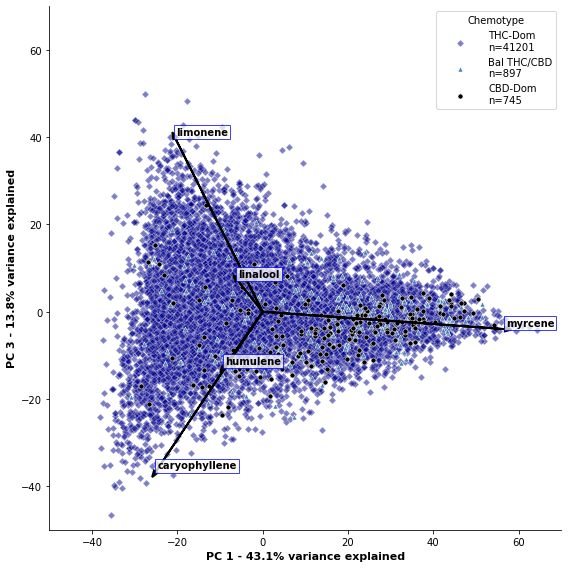

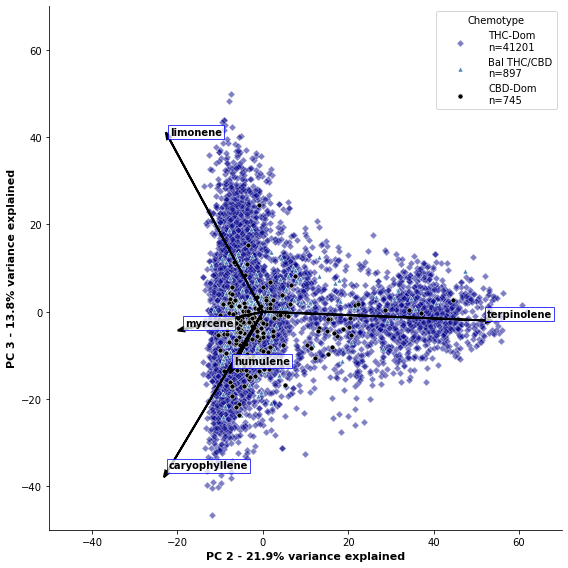

In [24]:
for comps, idx in zip([[0,1], [0,2], [1,2]], ['b','c','d']):
    A = comps[0]
    B = comps[1]

    scatter_props = {'x': A, 'y': B,
                     'xlims':(-50,70), 'ylims':(-50,70),
                     'hue': 'chemotype', 'sort_list': chemotypes,
                     'palette': ct_palette,
                     'title': '',
                     'figsize':(8,8), 'sample_frac':10000,
                    'comp_df': comp_df, 'n_display': 5}

    pc1_var = model.explained_variance_ratio_[A]
    pc2_var = model.explained_variance_ratio_[B]
    
    scatter_props['x_label'] = 'PC '+str(A+1)+' - '+str(round(pc1_var*100,1))+'% variance explained'
    scatter_props['y_label'] = 'PC '+str(B+1)+' - '+str(round(pc2_var*100,1))+'% variance explained'
    
    base_name = 'fig5/5{}_scatter_pca'.format(idx)
    scatter_props['save_name'] = base_name+'-'.join([str(x+1) for x in comps])

    run_graph(df_norm,
              **scatter_props)

### 5E: Terpene diversity within THC/CBD Chemotypes

In [25]:
strain_bool = pd.isna(terp_df['strain_slug'])
producer_bool = pd.isna(terp_df['anon_producer'])
fin_bool = strain_bool|producer_bool

# prod_df = terp_df[~pd.isna(terp_df['strain_slug'])].groupby(['strain_slug','anon_producer'])[common_terps+['tot_thc','tot_cbd']].mean()
prod_df = terp_df[~strain_bool].groupby(['strain_slug','anon_producer'])[common_terps+['tot_thc','tot_cbd']].mean()
prod_df = get_ct(prod_df)

In [26]:
def get_cos_dis(df):
    dis_scores = cosine_distances(df.fillna(0))
    dis_scores[dis_scores < 0.0000000000001] = np.nan
    return dis_scores

In [27]:
ct_sim_df = (prod_df.groupby('chemotype')[common_terps].apply(lambda x: list(np.nanmean(get_cos_dis(x[common_terps]), axis=0)))
                                     .explode()
                                     .astype('float64')
                                     .reset_index(drop=False)
                                     .rename(columns={0:'value'}))

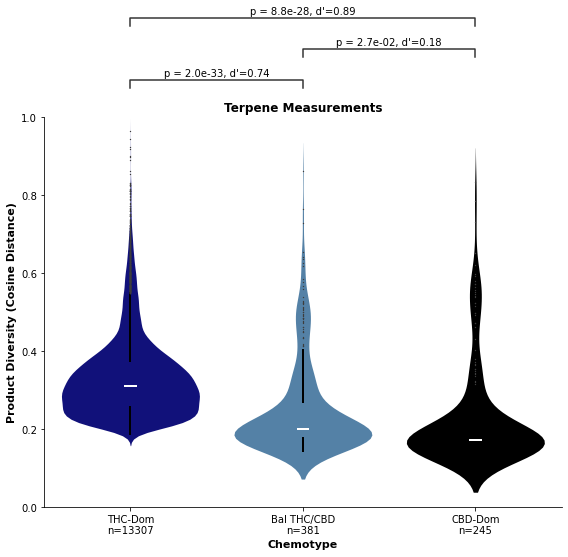

In [28]:
chemotypes = ['THC-Dom', 'Bal THC/CBD', 'CBD-Dom']
ct_palette = {'THC-Dom':'darkblue',
               'Bal THC/CBD': 'steelblue',
               'CBD-Dom': 'black'}

violin_props = {'x': 'chemotype', 'y': 'value',
                'ylims':(0,1),
                'order': chemotypes,
                'palette': ct_palette,
             'title': 'Terpene Measurements', 'save_name': 'fig5/5e_violin_terp_sim_prod',
             'x_label': 'Chemotype', 'y_label': 'Product Diversity (Cosine Distance)',
             'avg': False, 'sig_comp': True,
             'figsize':(8,8), 'sample_frac':1}

run_graph(ct_sim_df,
          **violin_props)

### 5F: Dominant Terps within THC/CBD Chemotypes

In [29]:
prod_df[common_terps] = prod_df[common_terps].fillna(0)
prod_df['top_terp'] = prod_df.loc[:,common_terps].apply(lambda x: x.idxmax(), axis=1)

In [30]:
# terp_order = prod_df.loc[prod_df['chemotype']=='THC-Dom', 'top_terp'].value_counts().index
# terp_df.loc[terp_df['chemotype']=='THC-Dom', 'top_terp_f'].value_counts()
terp_order = ['myrcene', 'caryophyllene', 'limonene', 'terpinolene', 'a_pinene',
       'tot_ocimene']
prod_df['top_terp'] = [x if x in terp_order else 'other' for x in prod_df['top_terp']]
# terp_df['top_terp_ff'] = [x if x in terp_order else 'other' for x in terp_df['top_terp_f']]

In [31]:
total = prod_df.groupby('chemotype')['top_terp'].value_counts()
# total = terp_df.groupby('chemotype')['top_terp_ff'].value_counts()
total = pd.DataFrame(total).unstack().fillna(0).apply(lambda x: x/x.sum()*100, axis=1)
total.columns = total.columns.droplevel()

In [32]:
terp_order = total.loc['THC-Dom'].sort_values(ascending=False).index

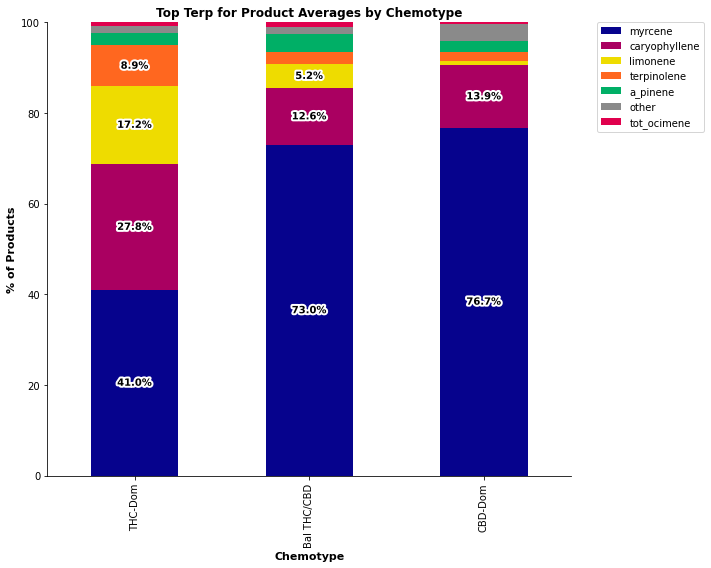

In [33]:
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'a_pinene': '#00af66',
             'b_pinene': '#81b59f', 'humulene': '#97d700', 'other': '#8a8a8a'}

bar_props = {'order': terp_order,
             'title': 'Top Terp for Product Averages by Chemotype', 'save_name': 'fig5/5f_stacked_ct_top-terp_prod',
             'x_label': 'Chemotype', 'y_label': '% of Products',
             'ylims':(0,100),
             'figsize':(10,8), 'palette': terp_dict}

run_graph(total.loc[chemotypes],
          **bar_props)

## Figure 6: Cluster Analysis of Terpenes

In [6]:
thc_terp_df = terp_df.loc[thc_bool].copy()
df_norm, arr, model = run_pca(thc_terp_df, common_terps, norm=True, n_components=3)

In [35]:
A=0; B=1

base_props = {'x': A, 'y': B,
             'figsize':(8,8), 'sample_frac':10000,
             'n_display': 6}

pc1_var = model.explained_variance_ratio_[A]
pc2_var = model.explained_variance_ratio_[B]
base_props['x_label'] = 'PC '+str(A+1)+' - '+str(round(pc1_var*100,1))+'% variance explained'
base_props['y_label'] = 'PC '+str(B+1)+' - '+str(round(pc2_var*100,1))+'% variance explained'


### 6A-B: PCA Scatterplot and Silhouette Scores by ISH

In [36]:
chemotypes = ['None', 'Indica', 'Hybrid', 'Sativa']
ish_dict = {'Indica': 'purple', 'Sativa': 'red', 'Hybrid': 'limegreen', 'None':'#8a8a8a'}

fig_props = {'hue': 'strain_category', 'palette':  ish_dict}

scatter_props = {'title': '(THC-Dom Only)',
                 'save_name': 'fig6/6A_scatter_pca_ish2',
                 'xlims':(-50,70), 'ylims':(-50,70),}

sil_props = {'x_label': 'Silhouette coefficient values', 'y_label': 'Sample Number (Sub-sampled)',
             'title': 'Silhouette plot for Strain Category\n(THC-Dom Only)',
             'save_name': 'fig6/6B_sil-score_ish', 'cols': common_terps,
            'xlims':(-0.7,0.7),'ylims':(0,10000)
            }


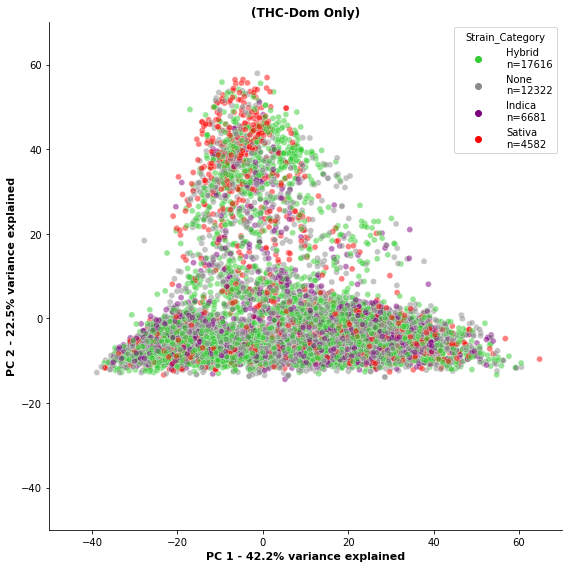

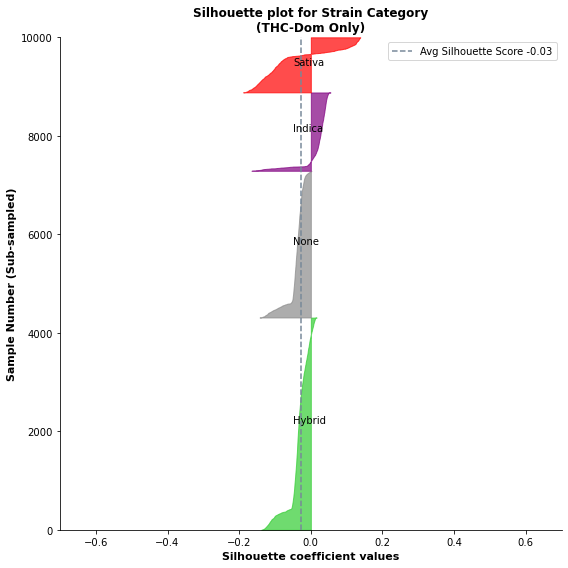

In [37]:
for props in [scatter_props, sil_props]:
    run_graph(df_norm,
              **{**base_props, **fig_props, **props})

### 6C-D: PCA Scatterplot and Silhouette Scores by Dom Terp

In [38]:
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'a_pinene': '#00af66',
             'b_pinene': '#81b59f', 'humulene': '#97d700', 'other': '#8a8a8a'}

fig_props = {'hue': 'top_terp_f', 'palette':  terp_dict,'n_display': 8}

scatter_props = {'title': '(THC-Dom Only)',
                 'save_name': 'fig6/6C_scatter_pca_dom-terp',
              'xlims':(-50,70), 'ylims':(-50,70)}

sil_props = {'x_label': 'Silhouette coefficient values', 'y_label': 'Sample Number (Sub-sampled)',
             'title': 'Silhouette plot for Dominant Terpene\n(THC-Dom Only)',
             'save_name': 'fig6/6D_sil-score_dom-terp', 'cols': common_terps,
            'xlims':(-0.75,0.75),'ylims':(0,10000)
            }


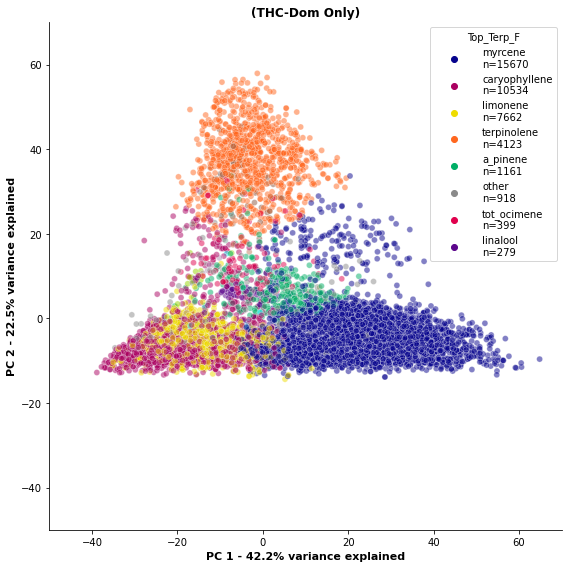

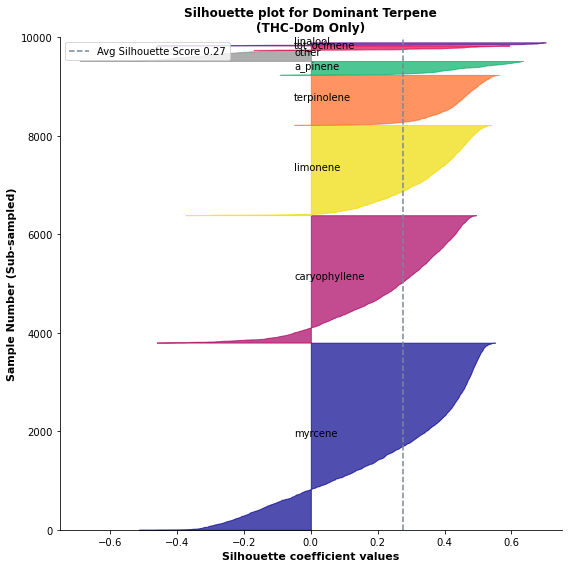

In [39]:
for props in [scatter_props, sil_props]:
# for props in [scatter_props]:
    run_graph(df_norm,
              **{**base_props, **fig_props, **props})

### 6E-F: PCA Scatterplot and Silhouette Scores by K-Means

In [40]:
# set up kmeans
clust = KMeans(3, random_state=56)

# get cluster labels
df_norm['kmeans_label'] = clust.fit_predict(df_norm[common_terps])
clust_dict = {x:y for x,y in zip(df_norm['kmeans_label'].value_counts().index, ['A','B','C','D'])}
df_norm['kmeans_label'] = df_norm['kmeans_label'].replace(clust_dict)

# create color palette
pal = sns.color_palette('colorblind', len(set(df_norm['kmeans_label'])))
pal_dict = {label: color for label, color in zip(set(df_norm['kmeans_label']), pal.as_hex())}


In [41]:
pal_dict = {}
for label in set(df_norm['kmeans_label']):
    terp_order = df_norm.loc[df_norm['kmeans_label']==label, common_terps].mean().sort_values(ascending=False)
    pal_dict[label] = terp_dict[terp_order[:1].index[0]]

In [140]:
pal_dict

{'A': '#aa0061', 'B': '#06038d', 'C': '#ff671f'}

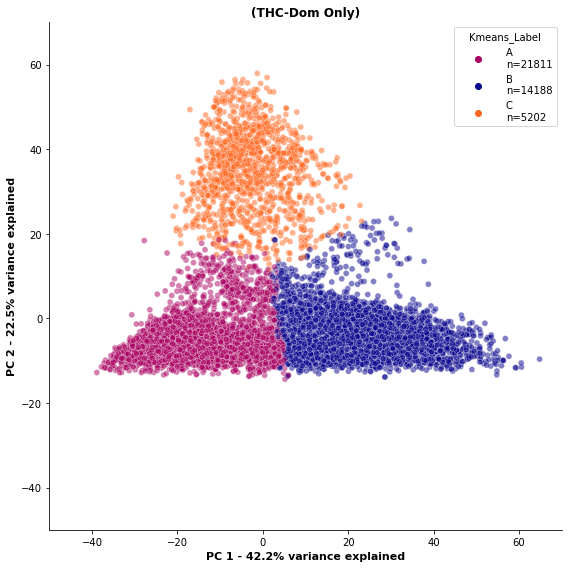

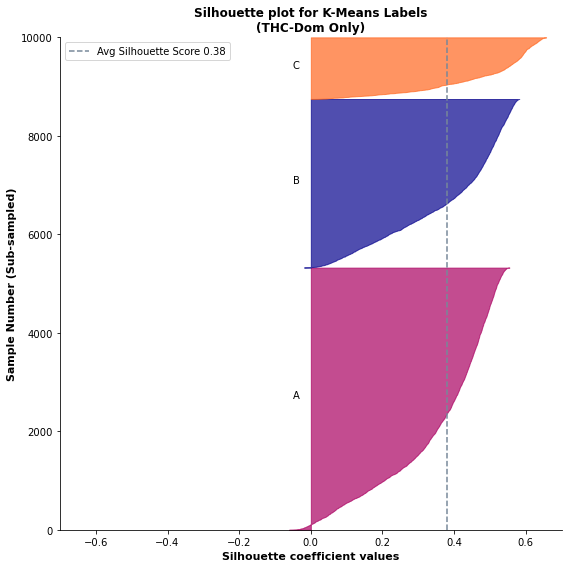

In [42]:
fig_props = {'hue': 'kmeans_label', 'palette':  pal_dict}

scatter_props = {'title': '(THC-Dom Only)',
                 'save_name': 'fig6/6E_scatter_pca_kmeans',
              'xlims':(-50,70), 'ylims':(-50,70)}

sil_props = {'x_label': 'Silhouette coefficient values', 'y_label': 'Sample Number (Sub-sampled)',
             'title': 'Silhouette plot for K-Means Labels\n(THC-Dom Only)',
             'save_name': 'fig6/6F_sil-score_kmeans', 'cols': common_terps,
            'xlims':(-0.7,0.7),'ylims':(0,10000)
            }

for props in [scatter_props, sil_props]:
    run_graph(df_norm,
              **{**base_props, **fig_props, **props})

#### S5: k-means Elbow Plot

In [43]:
thc_terp_df = terp_df.loc[thc_bool].copy()
df_norm, arr, model = run_pca(thc_terp_df, common_terps, norm=True, n_components=3)

In [44]:
max_k = 10
distortion = [] # within-cluster sum of squared errors array

x = df_norm[common_terps]

for k in range(1, max_k):
    km = KMeans(k)
    y = km.fit_predict(x)
    
    distortion.append(km.inertia_)

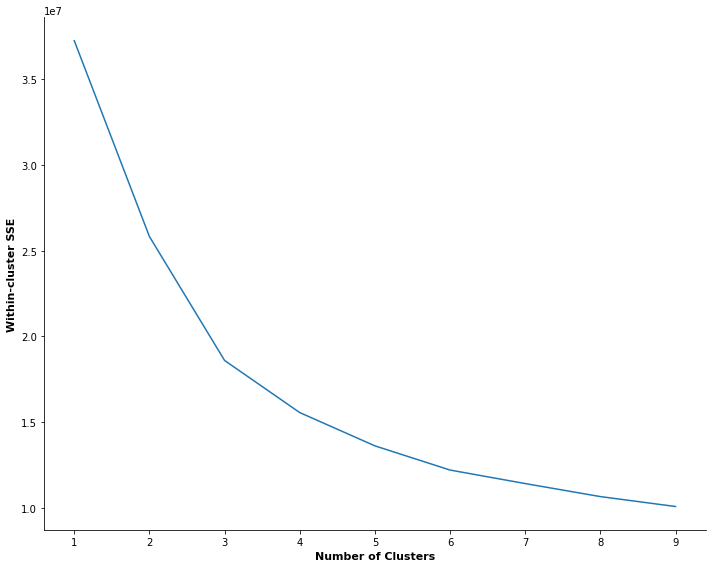

In [45]:
scatter_props = {'title': '',
                 'x': range(1,max_k),
                 'y': distortion,
                 'x_label': 'Number of Clusters',
                 'y_label': 'Within-cluster SSE',
                 'figsize':(10,8),
                 'save_name': 'S6/S6_line_elbow_plot'}
    
run_graph(df_norm,
          **scatter_props)

#### S5: k=2 and k=4 scatter plots

In [46]:
thc_terp_df = terp_df.loc[thc_bool].copy()
df_norm, arr, model = run_pca(thc_terp_df, common_terps, norm=True, n_components=3)

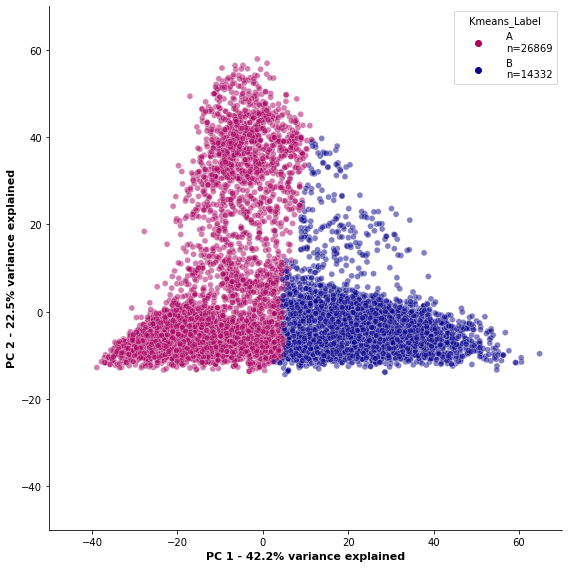

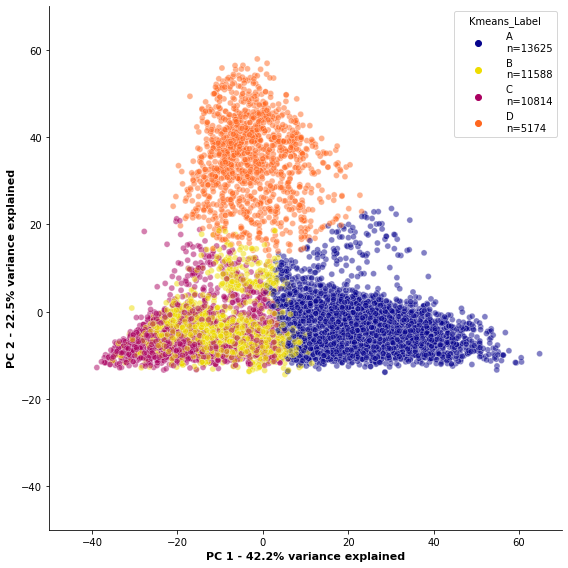

In [47]:
for k in [2,4]:
    # set up kmeans
    clust = KMeans(k, random_state=56)

    # get cluster labels
    df_norm['kmeans_label'] = clust.fit_predict(df_norm[common_terps])
    clust_dict = {x:y for x,y in zip(df_norm['kmeans_label'].value_counts().index, ['A','B','C','D'])}
    df_norm['kmeans_label'] = df_norm['kmeans_label'].replace(clust_dict)

#     # create color palette
#     pal = sns.color_palette('colorblind', len(set(df_norm['kmeans_label'])))
#     pal_dict = {label: color for label, color in zip(set(df_norm['kmeans_label']), pal.as_hex())}

    pal_dict = {}
    for label in set(df_norm['kmeans_label']):
        terp_order = df_norm.loc[df_norm['kmeans_label']==label, common_terps].mean().sort_values(ascending=False)
        pal_dict[label] = terp_dict[terp_order[:1].index[0]]
        
    fig_props = {'hue': 'kmeans_label', 'palette':  pal_dict}

    scatter_props = {'title': '',
                     'save_name': 'S6/S6_scatter_pca_kmeans_{}'.format(str(k)),
                  'xlims':(-50,70), 'ylims':(-50,70)}
    
    run_graph(df_norm,
              **{**base_props, **fig_props, **scatter_props})

#### S5: KDE Heatmap of PCA

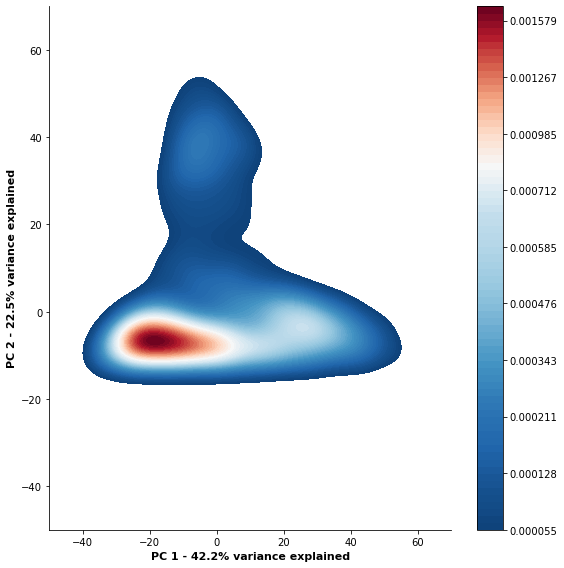

In [48]:
scatter_props = {'title': '',
                'save_name': 'S6/S6_kde_plot',
                  'xlims':(-50,70), 'ylims':(-50,70)}
    
run_graph(df_norm,
          **{**base_props, **fig_props, **scatter_props})

#### S6: PCA + Kmeans By Region

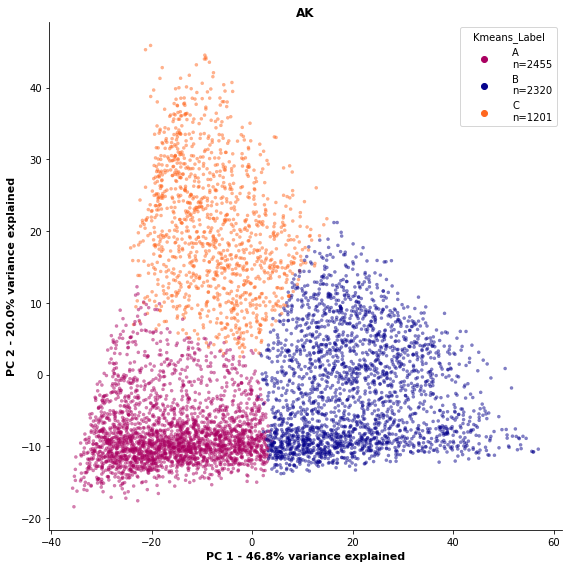

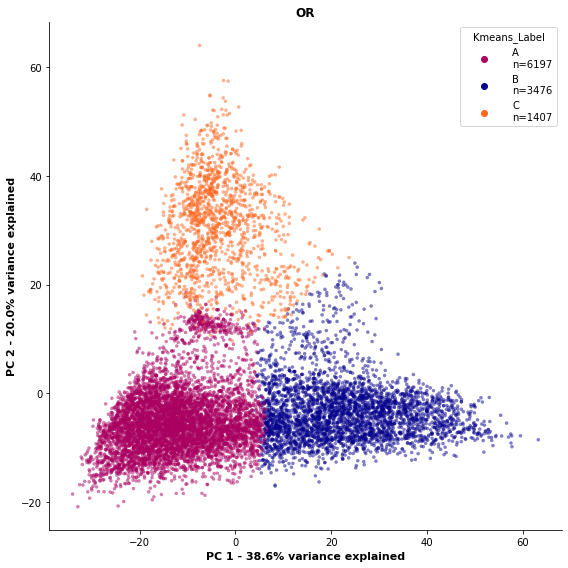

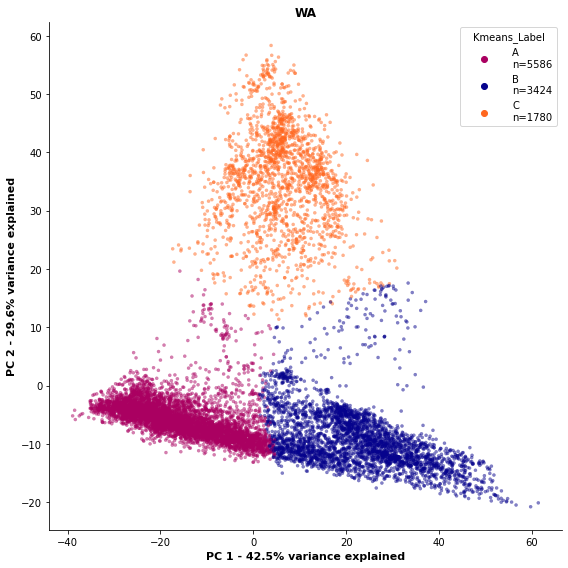

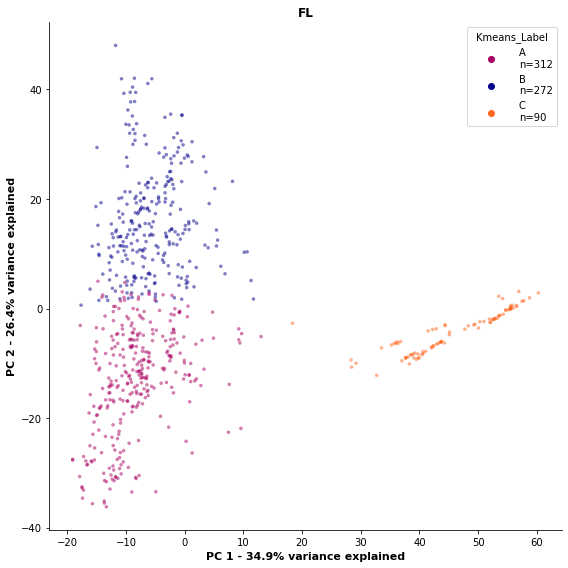

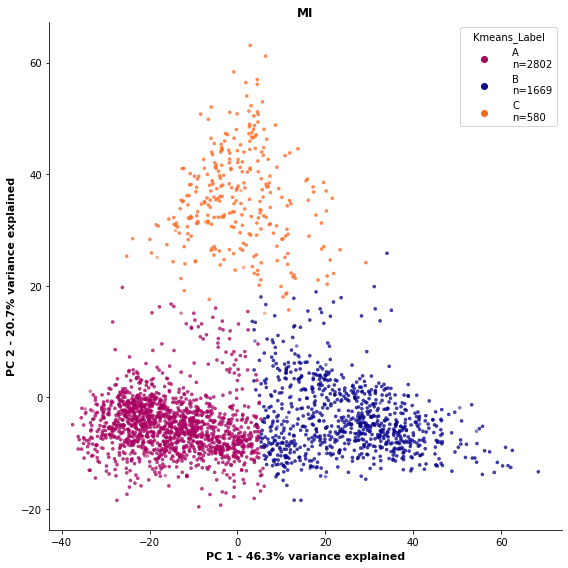

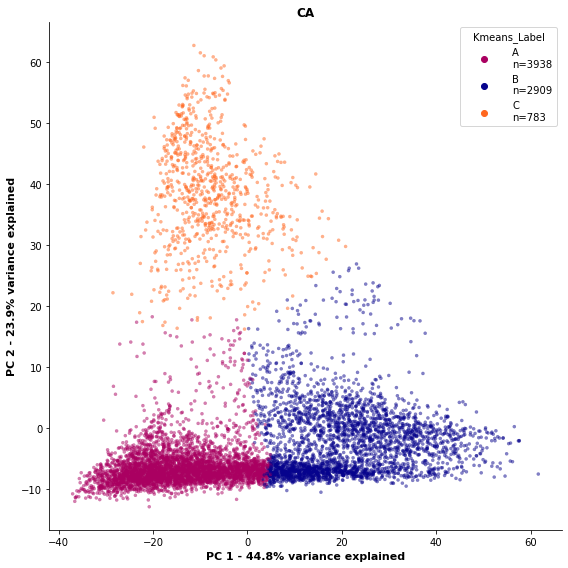

In [49]:
scatter_props = {'x': 0, 'y': 1,
         'hue': 'kmeans_label',
         'size': 10, 'edgecolor': None,
         'title': '',
         'figsize':(8,8), 'sample_frac':1, 'n_display': 5}


thc_terp_df = terp_df.loc[thc_bool].copy()

for region in terp_df['region'].unique():
    df_norm, arr, model = run_pca(thc_terp_df.loc[thc_terp_df['region']==region, :], common_terps, norm=True, n_components=3)
    
    A=0; B=1

    pc1_var = model.explained_variance_ratio_[A]
    pc2_var = model.explained_variance_ratio_[B]
    scatter_props['x_label'] = 'PC '+str(A+1)+' - '+str(round(pc1_var*100,1))+'% variance explained'
    scatter_props['y_label'] = 'PC '+str(B+1)+' - '+str(round(pc2_var*100,1))+'% variance explained'

    
    # set up kmeans
    clust = KMeans(3, random_state=56)

    # get cluster labels
    df_norm['kmeans_label'] = clust.fit_predict(df_norm[common_terps])
    clust_dict = {x:y for x,y in zip(df_norm['kmeans_label'].value_counts().index, ['A','B','C'])}
    df_norm['kmeans_label'] = df_norm['kmeans_label'].replace(clust_dict)

    pal_dict = {'A': '#aa0061', 'B': '#06038d', 'C': '#ff671f'}
        
    run_graph(df_norm,
              **{**scatter_props,
                 **{'title': region,
                    'palette': pal_dict,
                    'save_name': 'S6/S6_scatter_terps_PCA_kmeans3_{}'.format(region)}})

## Figure 7: Terpene Cluster Averages

In [12]:
thc_terp_df = terp_df.loc[thc_bool].copy()
df_norm, arr, model = run_pca(thc_terp_df, common_terps, norm=True, n_components=3)

# set up kmeans
clust = KMeans(3, random_state=56)

# get cluster labels
df_norm['kmeans_label'] = clust.fit_predict(df_norm[common_terps])
clust_dict = {x:y for x,y in zip(df_norm['kmeans_label'].value_counts().index, ['A','B','C','D'])}
df_norm['kmeans_label'] = df_norm['kmeans_label'].replace(clust_dict)

In [13]:
get_round(df_norm['kmeans_label'].value_counts()/df_norm.shape[0],2)

A    53.80
B    33.73
C    12.47
Name: kmeans_label, dtype: float64

In [14]:
df_norm.to_csv('data/normed_thc_dom_kmeans_20220218_nl.csv', index=False)

In [41]:
df_norm.groupby('kmeans_label')['total_terps'].mean()

kmeans_label
A    1.890680
B    2.007034
C    2.193064
Name: total_terps, dtype: float64

In [49]:
_df = df_norm[['kmeans_label','total_terps']].rename(columns={'total_terps':'value'})

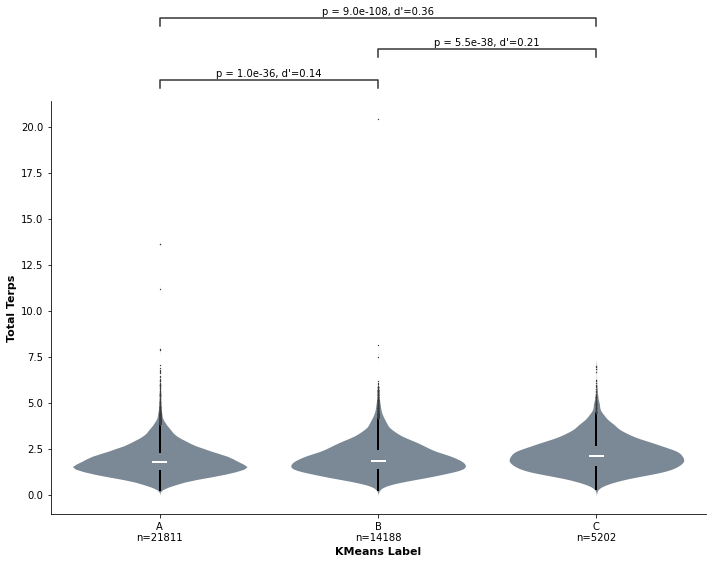

In [51]:
violin_props = {'x': 'kmeans_label', 'y': 'value', 
                'order': ['A','B','C'],
             'save_name': 'fig7/7g_violin-plot_cluster-total_terps',
             'x_label': 'KMeans Label', 'y_label': 'Total Terps', 'title':'',
             'avg': False, 'sig_comp': True, 'figsize':(10,8),'sample_frac':20000}

run_graph(_df,
          **violin_props)

### 7A: Violin Plot Comparing Clustering Methods

In [42]:
sub_df = sample_df(df_norm, 1)

# Assign labels
strain_cat_labels = sub_df['strain_category'].astype(str)
top_terp_labels = sub_df['top_terp_f'].astype(str)
kmeans_labels = sub_df['kmeans_label'].astype(str)

In [43]:
sil_dict = {}

for labels, clust in zip([strain_cat_labels,
                          top_terp_labels,
                          kmeans_labels],
                          ['strain_category',
                          'top_terp_f',
                          'KMeans']): 
    sample_sil_val = silhouette_samples(sub_df[common_terps], labels)
    sil_dict[clust] = sample_sil_val

In [44]:
sil_df = pd.DataFrame.from_dict(sil_dict).T
sil_df['label_method'] = sil_df.index

In [46]:
pd.melt(sil_df, id_vars='label_method')

label_method variable     value
0       strain_category        0 -0.031933
1            top_terp_f        0  0.129869
2                KMeans        0 -0.036613
3       strain_category        1 -0.075134
4            top_terp_f        1 -0.070979
...                 ...      ...       ...
123598       top_terp_f    41199 -0.050476
123599           KMeans    41199  0.442964
123600  strain_category    41200 -0.019534
123601       top_terp_f    41200  0.312776
123602           KMeans    41200  0.504879

[123603 rows x 3 columns]

In [17]:
0.05/3

0.016666666666666666

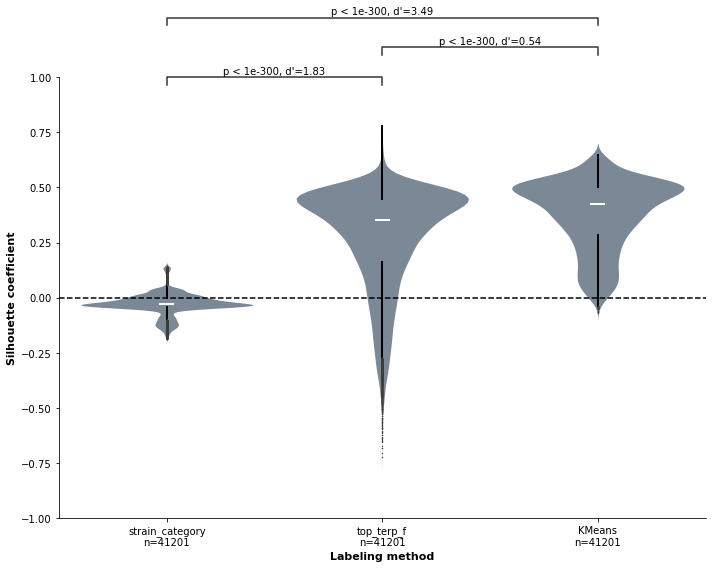

In [55]:
violin_props = {'x': 'label_method', 'y': 'value', 
                'order': ['strain_category', 'top_terp_f', 'KMeans'],
             'save_name': 'fig7/7a_violin-plot_cluster-sil-scores',
             'x_label': 'Labeling method', 'y_label': 'Silhouette coefficient',
                'ylims':(-1,1), 'title':'',
             'avg': False, 'sig_comp': True, 'figsize':(10,8),'sample_frac':20000}

run_graph(pd.melt(sil_df, id_vars='label_method'),
          **violin_props)

### 7B: Bar Chart of Groupings

In [134]:
terp_order = ['myrcene', 'caryophyllene', 'limonene', 'terpinolene', 'a_pinene',
       'tot_ocimene']
df_norm['top_terp'] = [x if x in terp_order else 'other' for x in df_norm['top_terp_f']]

In [57]:
group_counts = df_norm.loc[:,['strain_category','top_terp','kmeans_label']].apply(lambda x: x.value_counts())
group_counts = pd.melt(group_counts.reset_index(drop=False), id_vars='index')
# group_counts = group_counts.reset_index(drop=False)

In [58]:
group_counts = pd.pivot(group_counts, index='variable', columns='index', values='value')

In [58]:
group_counts.head()

index                  A        B       C   Hybrid  Indica    None  Sativa  \
variable                                                                     
kmeans_label     17258.0  11232.0  4211.0      NaN     NaN     NaN     NaN   
strain_category      NaN      NaN     NaN  17511.0  6656.0  3962.0  4572.0   
top_terp             NaN      NaN     NaN      NaN     NaN     NaN     NaN   

index            a_pinene  caryophyllene  limonene  myrcene   other  \
variable                                                              
kmeans_label          NaN            NaN       NaN      NaN     NaN   
strain_category       NaN            NaN       NaN      NaN     NaN   
top_terp            877.0         8458.0    5836.0  12476.0  1392.0   

index            terpinolene  tot_ocimene  
variable                                   
kmeans_label             NaN          NaN  
strain_category          NaN          NaN  
top_terp              3342.0        320.0

In [59]:
total = group_counts.fillna(0).apply(lambda x: x/x.sum()*100, axis=1)

In [60]:
flat_list = []
for x in ['strain_category','top_terp','kmeans_label']:
    for item in df_norm[x].value_counts().index:
        flat_list.append(item)


In [61]:
flat_list

['Hybrid',
 'Indica',
 'Sativa',
 'None',
 'myrcene',
 'caryophyllene',
 'limonene',
 'terpinolene',
 'other',
 'a_pinene',
 'tot_ocimene',
 'A',
 'B',
 'C']

In [61]:
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'a_pinene': '#00af66',
             'b_pinene': '#81b59f', 'humulene': '#97d700', 'other': '#8a8a8a'}

pal_dict = {}
for label in set(df_norm['kmeans_label']):
    terp_order = df_norm.loc[df_norm['kmeans_label']==label, common_terps].mean().sort_values(ascending=False)
    pal_dict[label] = terp_dict[terp_order[:1].index[0]]
    
ish_dict = {'Indica': 'purple', 'Sativa': 'red', 'Hybrid': 'limegreen', 'None':'#8a8a8a'}

all_dict = {**terp_dict, **pal_dict, **ish_dict}

In [63]:
total

index                    A          B          C     Hybrid     Indica  \
variable                                                                 
kmeans_label     52.775144  34.347573  12.877282   0.000000   0.000000   
strain_category   0.000000   0.000000   0.000000  53.548821  20.354118   
top_terp          0.000000   0.000000   0.000000   0.000000   0.000000   

index                 None     Sativa  a_pinene  caryophyllene   limonene  \
variable                                                                    
kmeans_label      0.000000   0.000000  0.000000       0.000000   0.000000   
strain_category  12.115837  13.981224  0.000000       0.000000   0.000000   
top_terp          0.000000   0.000000  2.681875      25.864652  17.846549   

index              myrcene     other  terpinolene  tot_ocimene  
variable                                                        
kmeans_label      0.000000  0.000000     0.000000     0.000000  
strain_category   0.000000  0.000000     0.000000     0.000000  
top_terp         38.151738  4.256751    10.219871     0.978563

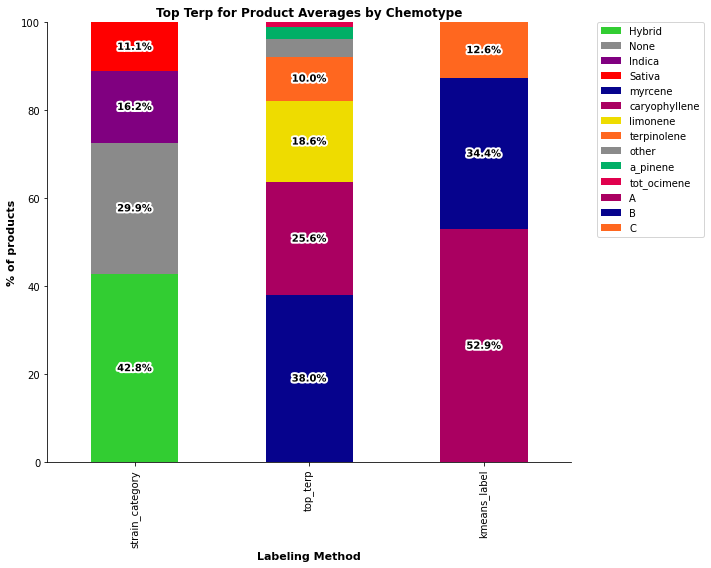

In [62]:
bar_props = {'order': flat_list,
             'title': 'Top Terp for Product Averages by Chemotype', 'save_name': 'fig7/7b_stacked_groups',
             'x_label': 'Labeling Method', 'y_label': '% of products',
             'ylims':(0,100),
             'figsize':(10,8), 'palette': all_dict}

run_graph(total.loc[['strain_category', 'top_terp', 'kmeans_label'],:],
          **bar_props)

### 7C: UMAP Scatter Plot

In [135]:
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'a_pinene': '#00af66',
             'b_pinene': '#81b59f', 'humulene': '#97d700', 'other': '#8a8a8a'}

pal_dict = {}
for label in set(df_norm['kmeans_label']):
    terp_order = df_norm.loc[df_norm['kmeans_label']==label, common_terps].mean().sort_values(ascending=False)
    pal_dict[label] = terp_dict[terp_order[:1].index[0]]
    

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from umap import UMAP

X_cann = df_norm[common_cannabs].fillna(0)
X_cann_standard = MinMaxScaler().fit_transform(X_cann)

X_terps = df_norm[common_terps].fillna(0)
# X_terps_standard = MinMaxScaler().fit_transform(X_terps)

X_all = df_norm[common_cannabs+common_terps].fillna(0)
X_all_standard = MinMaxScaler().fit_transform(X_all)

In [137]:
umap_ = UMAP(n_components=2, n_neighbors=15,
             random_state=56)

X_terps_umap = umap_.fit_transform(X_terps)

df_norm['umap_0'] = X_terps_umap[:,0]
df_norm['umap_1'] = X_terps_umap[:,1]

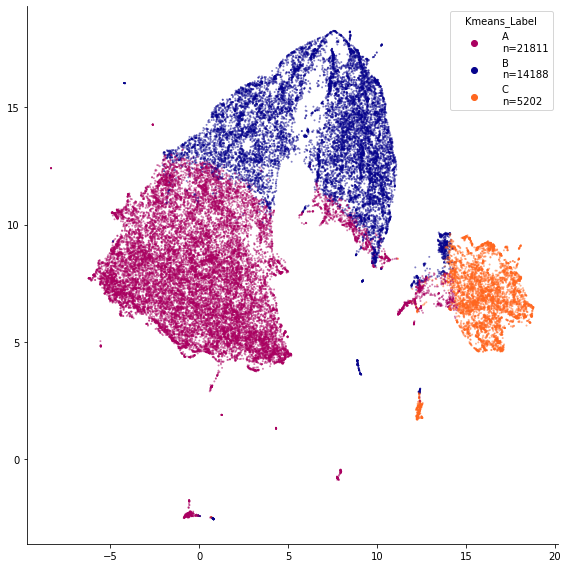

In [66]:
scatter_props = {'x': 'umap_0', 'y': 'umap_1',
             'x_label': '', 'y_label': '',
             'hue': 'kmeans_label',
             'palette': pal_dict,
             'size': 3, 'edgecolor': None,
             'title': '', 'save_name': 'fig7/7c_scatter_terps_umap_kmeans3',
             'figsize':(8,8), 'sample_frac':1, 'n_display': 5}

run_graph(df_norm,
          **scatter_props)

#### S4: UMAP + Kmeans By Region

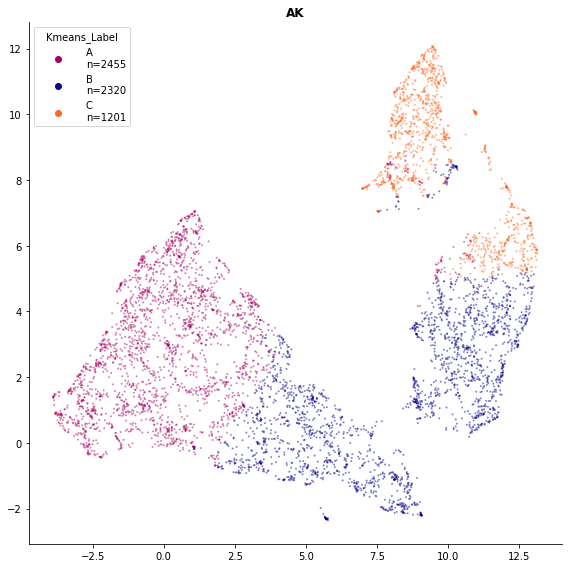

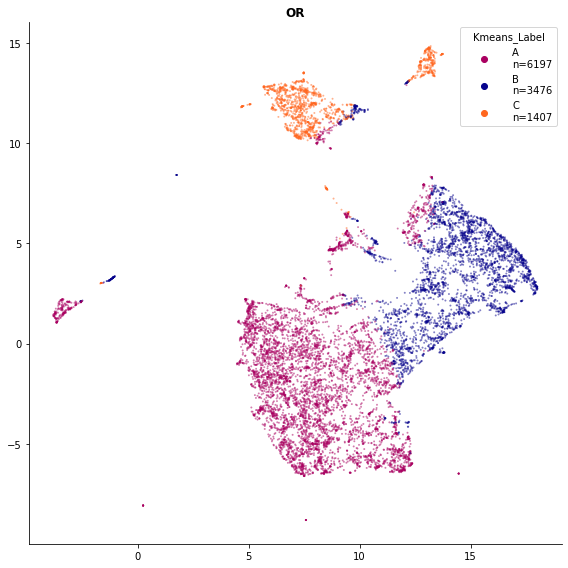

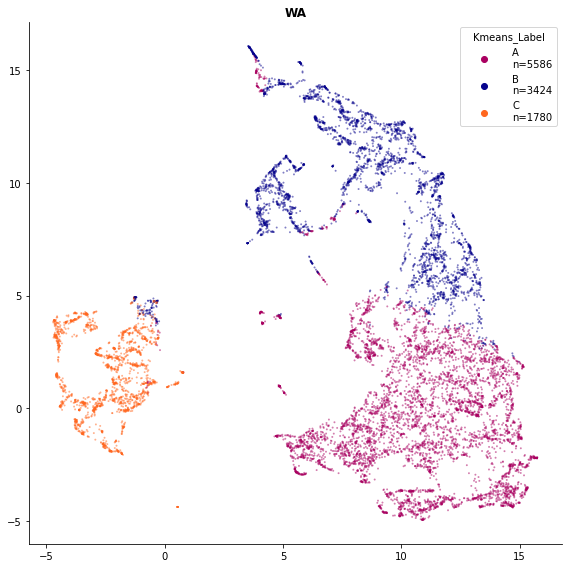

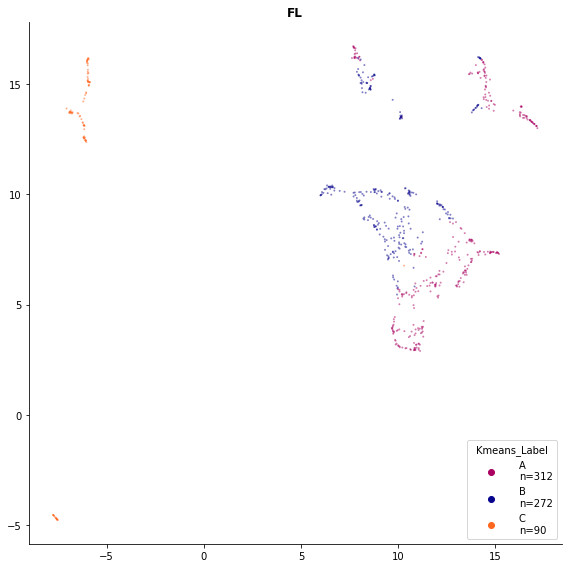

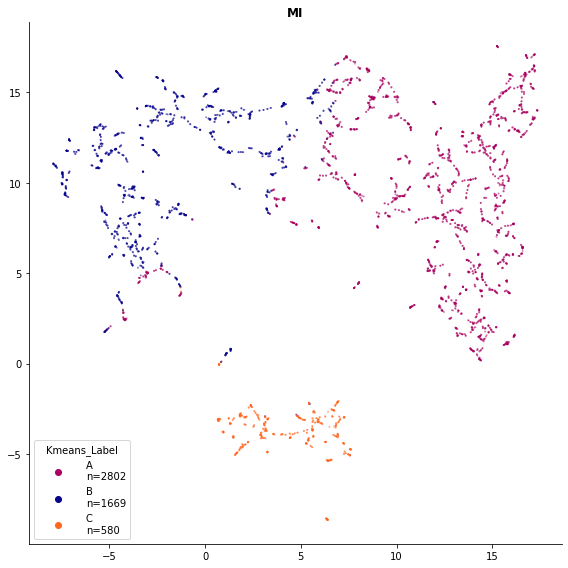

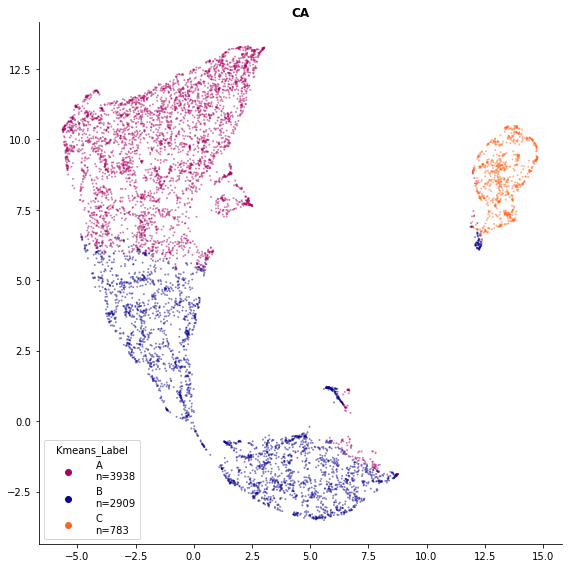

In [67]:
scatter_props = {'x': 'umap_0', 'y': 'umap_1',
         'x_label': '', 'y_label': '',
         'hue': 'kmeans_label',
         'palette': pal_dict,
         'size': 3, 'edgecolor': None,
         'title': '',
         'figsize':(8,8), 'sample_frac':1, 'n_display': 5}


thc_terp_df = terp_df.loc[thc_bool].copy()

for region in terp_df['region'].unique():
    df_norm, arr, model = run_pca(thc_terp_df.loc[thc_terp_df['region']==region, :], common_terps, norm=True, n_components=3)
    
    # set up kmeans
    clust = KMeans(3, random_state=56)

    # get cluster labels
    df_norm['kmeans_label'] = clust.fit_predict(df_norm[common_terps])
    clust_dict = {x:y for x,y in zip(df_norm['kmeans_label'].value_counts().index, ['A','B','C'])}
    df_norm['kmeans_label'] = df_norm['kmeans_label'].replace(clust_dict)

    pal_dict = {}
    for label in set(df_norm['kmeans_label']):
        terp_order = df_norm.loc[df_norm['kmeans_label']==label, common_terps].mean().sort_values(ascending=False)
        pal_dict[label] = terp_dict[terp_order[:1].index[0]]
        
    X_terps = df_norm[common_terps].fillna(0)
    
    umap_ = UMAP(n_components=2, n_neighbors=15,
             random_state=56)

    X_terps_umap = umap_.fit_transform(X_terps)

    df_norm['umap_0'] = X_terps_umap[:,0]
    df_norm['umap_1'] = X_terps_umap[:,1]

    run_graph(df_norm,
              **{**scatter_props,
                 **{'title': region,
                    'save_name': 'S4/S4_scatter_terps_umap_kmeans3_{}'.format(region)}})

### 7D-F: Polar plot + Bar plots of each cluster

In [138]:
df_norm['pinene'] = df_norm['a_pinene']+df_norm['b_pinene']
clust_terps = ['tot_ocimene', 'camphene', 'g_terpinene', 'tot_nerolidol_ct',
       'humulene', 'caryophyllene', 'limonene', 'linalool', 'myrcene',
       'bisabolol', 'a_terpinene', 'terpinolene', 'pinene']

In [139]:
clust_avg_df = df_norm.groupby('kmeans_label')[common_cannabs+clust_terps].mean()
# clust_avg_df.reset_index(drop=False, inplace=True)

In [21]:
df_norm.loc[df_norm['kmeans_label']=='B'][common_terps].mean().sort_values(ascending=False)[:10]

myrcene          44.944080
caryophyllene    13.135808
a_pinene         10.696952
limonene          9.277029
b_pinene          5.084596
humulene          4.612661
linalool          4.330702
tot_ocimene       2.789232
bisabolol         1.750974
terpinolene       0.986674
dtype: float64

In [140]:
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'pinene': '#00af66',
             'humulene': '#97d700', 'other': '#8a8a8a'}

terp_order = ['myrcene', 'linalool', 'pinene', 'caryophyllene',
              'humulene', 'limonene', 'ocimene', 'terpinolene']

terp_order = ['tot_nerolidol_ct', 'limonene', 'linalool', 'humulene',
             'caryophyllene', 'tot_ocimene', 'terpinolene', 'myrcene', 'a_pinene', 'b_pinene']

In [79]:
clust_avg_df[clust_terps].mean().sort_values(ascending=False)[:10]

myrcene             24.489753
caryophyllene       18.463376
limonene            14.083686
terpinolene         13.446554
pinene              11.008902
humulene             5.819354
linalool             4.037424
tot_ocimene          3.625526
bisabolol            2.557157
tot_nerolidol_ct     1.579222
dtype: float64

In [144]:
terp_order = ['humulene', 'pinene', 'limonene', 'terpinolene', 'caryophyllene',
             'linalool', 'myrcene', 'tot_ocimene']

In [145]:
fin_prod_df = get_prod_df(terp_df.loc[thc_bool],
                           1, 1,
                           common_cannabs, common_terps)

In [146]:
df_norm = get_kmeans(fin_prod_df, common_terps)

pal_dict = get_pal_dict(df_norm, common_terps, terp_dict)

df_norm['pinene'] = df_norm['a_pinene']+df_norm['b_pinene']

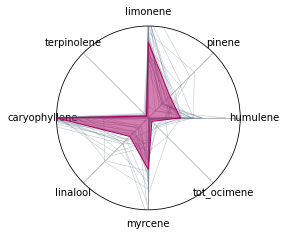

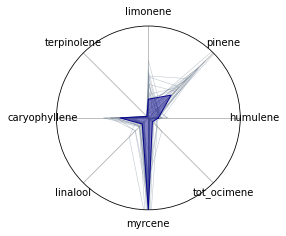

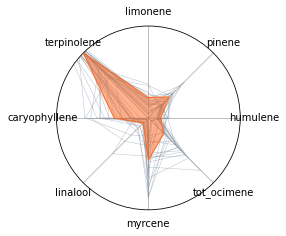

In [149]:
for idx, (group, data) in zip(['D','E','F'], df_norm.groupby('kmeans_label')):
    # create figure
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.add_subplot(polar=True)

    ax1 = run_polar_plot(data, ax1,
                    **{'cols': terp_order,
                    'colors': 'lightslategray',
                    'palette': terp_dict,
                    'sub_n': 25,
                    'avg': True})
    
    plt.tight_layout()
    plt.savefig('viz/fig7/7'+idx+'_polar-plot.pdf')

In [37]:
df_norm.head()

anon_producer    strain_slug    tot_thc   tot_cbd   tot_cbg   tot_cbc  \
64            03_mcs  original-glue  19.239961  0.061558  0.421524  0.013411   
123     100_canntest  original-glue  21.302775  0.065188  0.596203  0.005179   
137  100_chemhistory  original-glue  24.937230  0.096470  1.827530  0.020000   
262        10363_psi  original-glue  21.737950  0.000000  0.228020  0.110000   
300           103_sc  original-glue  19.093210  0.043850  0.492190  0.010000   

      tot_cbn  tot_thcv  tot_ocimene  camphene  g_terpinene  tot_nerolidol_ct  \
64   0.007778  0.011833     0.503743  0.488646     0.515527          3.074011   
123  0.000000  0.073561     0.471216  0.506919     0.215841          1.942470   
137  0.000000  0.020000     0.000000  1.276596     0.000000          0.000000   
262  0.000000  0.000000     0.724638  1.449275     0.000000          0.000000   
300  0.000000       NaN     0.000000  0.347356     0.000000          6.445388   

      humulene  caryophyllene   limonene  linalool    myrcene  bisabolol  \
64   20.249147      46.216956   7.904863  2.310664   8.822501   6.161279   
123  13.827934      37.783501  15.216728  3.703722  17.886864   3.419359   
137  18.297872      32.340426  21.276596  8.085106  13.191489   0.000000   
262  10.869565      36.956522  13.043478  4.347826  23.188406   2.898551   
300  12.350444      41.026631  12.196063  3.975299  14.241606   3.087611   

     b_pinene  a_terpinene  terpinolene  a_pinene  chemotype_ratio chemotype  \
64   1.579352     0.478703     0.478703  1.215906       312.548187   THC-Dom   
123  2.696294     0.129221     0.258719  1.941212       326.789248   THC-Dom   
137  3.404255     0.000000     0.000000  2.127660       258.497253   THC-Dom   
262  2.173913     0.000000     2.173913  2.173913              inf   THC-Dom   
300  4.091085     0.000000     0.154381  2.084137       435.420981   THC-Dom   

     n_prod  n_samps          0         1          2 kmeans_label    pinene  
64      369       18 -24.388598 -8.088499 -24.068068            A  2.795259  
123     369       13 -14.644425 -8.988925 -12.368504            A  4.637507  
137     369        1 -19.036139 -8.279813  -4.372033            A  5.531915  
262     369        2  -8.837609 -7.774403 -13.274991            A  4.347826  
300     369        2 -17.965147 -8.245895 -15.755249            A  6.175222

## Figure 8: Strain Name Variation

In [3]:
n_samp_min = 1
n_prod_min = 1

In [10]:
fin_prod_df = get_prod_df(terp_df.loc[thc_bool],
                           n_samp_min, n_prod_min,
                           common_cannabs, common_terps)

In [152]:
final_n_df = pd.DataFrame(index=range(2,10), columns=range(2,10))
final_n_df.rename_axis("n_prod", axis=1, inplace=True)
final_n_df.rename_axis("n_samples", axis=0, inplace=True)

In [89]:
# subset to samples with terp data
terp_df = lab_df[lab_df['has_terps']].copy()

for n_samp in range(2,10):
    n_samp_df = terp_df.groupby(['anon_producer','strain_slug'])['u_id'].count()
    samp_df = n_samp_df[n_samp_df>=n_samp]
    for n_prod in range(2,10):
        final_n_df.loc[n_samp, n_prod] = np.sum(samp_df.groupby('strain_slug').count()>=n_prod)

In [90]:
final_n_df

n_prod       2    3    4    5    6    7    8    9
n_samples                                        
2          848  551  370  274  210  172  138  120
3          488  282  177  121   92   72   54   44
4          339  189  112   69   51   44   37   31
5          239  120   62   43   33   24   23   15
6          183   87   47   30   22   17   12    7
7          135   64   32   22   14    8    7    6
8          113   51   28   14    8    5    4    3
9           89   39   17    9    5    4    3    2

### 8A: Scatter of Popularity and # of Products

In [16]:
strain_info.head()

strain_slug strain_category  strain_popularity
0               ak-47          Hybrid           0.227564
1            chemdawg          Hybrid           0.288464
2             mr-nice          Indica           0.040013
3   super-silver-haze          Sativa           0.211399
4  northern-lights--5          Indica           0.013108

In [20]:
n_prods = fin_prod_df.groupby('strain_slug')['n_prod'].mean()
n_prod_df = n_prods.to_frame().merge(strain_info[['strain_slug','strain_popularity']], how='left', on='strain_slug')

In [21]:
n_prod_df[['n_prod','strain_popularity']].describe()

n_prod  strain_popularity
count  2590.000000        1965.000000
mean      5.174131           0.025376
std      13.444081           0.070891
min       1.000000           0.000000
25%       1.000000           0.002185
50%       2.000000           0.006045
75%       4.000000           0.018002
max     369.000000           1.000000

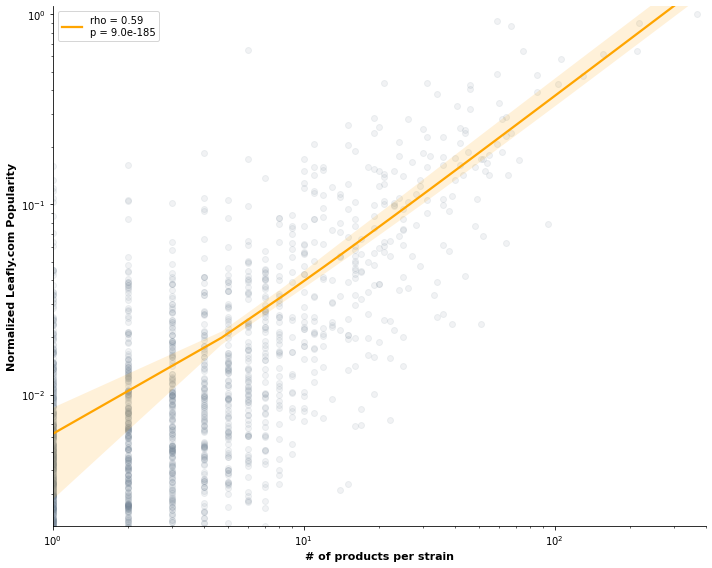

In [108]:
scatter_props = {'x': 'n_prod', 'y': 'strain_popularity',
                 'xlims':(0,400), 'ylims':(0,1.1), 'log': True,
                'x_label': '# of products per strain',
                'y_label': 'Normalized Leafly.com Popularity',
                'save_name': 'fig8/8a_reg_prod_strains',
                'figsize':(10,8),
                'sample_frac':1, 'title':''}

run_graph(n_prod_df, **scatter_props)

### 8B: Correlation Matrix of Pairwise Variation (Top N)

In [91]:
import scipy.ndimage as sp
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle

def run_corr_matrix(arr, labels,
                   mask_fig=False,
                   save_name='8A_corr_matrix_bw_samp_full'):
    fig, ax = plt.subplots(figsize=(10,8))
    
    if mask_fig:
        mask = np.tril(np.ones_like(arr, dtype=bool))
        ax = sns.heatmap(arr,
                         mask=mask,
                         cmap='seismic',
                         vmin=0, vmax=1,
                         ax=ax,
                         rasterized=True)
    else:
        ax = sns.heatmap(arr,
                         cmap='seismic',
                         vmin=0, vmax=1,
                         ax=ax,
                         rasterized=True)
    
    # set ticks and labels
    dupe = labels.duplicated()
    majors = [idx for idx, x in enumerate(~dupe) if x==True]

    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
    ax.set_xticklabels(labels.loc[~dupe], rotation=45, ha='right')

    ax.yaxis.set_major_locator(ticker.FixedLocator(majors))
    ax.set_yticklabels(labels.loc[~dupe])
    
    # add boxes
    idxs = list({v:i for i,v in enumerate(labels)}.values())
    idxs.insert(0,0)
    
    majors.insert(len(majors)+1, len(labels))
    
    for previous, current in zip(majors, majors[1:]):
        ax.axvline(current, color='black', lw=1)
        ax.axhline(current, color='black', lw=1)
        size = current - previous
        ax.add_patch(Rectangle((previous, previous), size, size, edgecolor='black', fill=False, lw=4))

    if mask_fig:
        # add triangle
        t1 = plt.Polygon(np.array([(0,0),
                                   (labels.shape[0], labels.shape[0]),
                                   (0,labels.shape[0])]), color='white', zorder=5)
        ax.add_patch(t1)
    
    plt.savefig('viz/fig8/'+save_name+'.pdf')
    return ax

In [92]:
# use list of strains obtained by the five-samp, five-prod threshold, but use full product dataset for analysis
n_samp_df = terp_df.loc[thc_bool].groupby(['anon_producer','strain_slug'])['u_id'].count()
samp_df = n_samp_df[n_samp_df>=5]
top_n_strains = samp_df.groupby('strain_slug').count().sort_values(ascending=False)[:10].index
top_n_strains = fin_prod_df.groupby('strain_slug')['anon_producer'].count().loc[top_n_strains].sort_values(ascending=False).index
sort_order = {k:v for k,v in zip(top_n_strains, range(len(top_n_strains)))}

strains_5s5p = samp_df.groupby('strain_slug').count()[samp_df.groupby('strain_slug').count()>=5].index

In [93]:
len(strains_5s5p)

41

In [95]:
def get_cos_sim(df, add_nan=False):
    sim_scores = cosine_similarity(df)
    if add_nan:
        sim_scores[sim_scores > 0.9999999999999] = np.nan
    else:
        sim_scores[sim_scores > 0.9999999999999] = 1
    return sim_scores

In [109]:
strain_bool = fin_prod_df['strain_slug'].isin(top_n_strains)

# make sure to sort the strains the same way
fin_prod_df['strain_sort'] = fin_prod_df['strain_slug'].replace(sort_order)
fin_prod_df = fin_prod_df.sort_values(by=['strain_sort','anon_producer'], ascending=True)

X_terps_top10 = fin_prod_df.loc[strain_bool, common_terps].fillna(0)

# get cosine sim matrix for these dfs
X_terps_sim_top10 = get_cos_sim(X_terps_top10)

<AxesSubplot:>

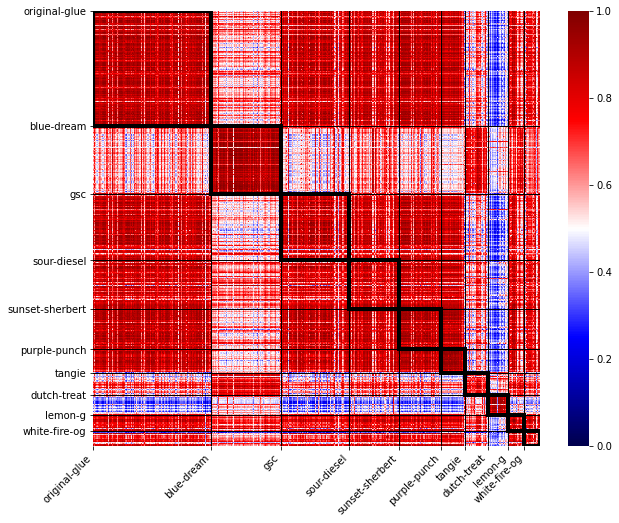

In [110]:
mat4plot = sp.filters.gaussian_filter(X_terps_sim_top10, sigma=0.65, order=0)

run_corr_matrix(mat4plot,
               fin_prod_df.loc[strain_bool, 'strain_slug'],
               mask_fig=False,
               save_name='8B_corr_matrix_bw_prod_full')

### 8C: Violin Plot of B/W Producer Consistency

In [111]:
sub_prod_df = fin_prod_df.loc[fin_prod_df['strain_slug'].isin(strains_5s5p)].copy()
X_terps = sub_prod_df[common_terps].fillna(0)

bw_prod_df_terps, avgs_terps, weights_terps = run_all_cos_sims(X_terps.join(sub_prod_df['strain_slug']),
                                                                common_terps)

print('terps')
print('avg b/w prod similarity in dataset: '+str(np.average(avgs_terps, weights=weights_terps)))

terps
avg b/w prod similarity in dataset: 0.79444597057217


In [112]:
# bootstrap for "random similarity"
# terps only
runs = 200
bs_avgs = []

for run in tqdm(range(runs)):
    sub_prod_df['strain_slug_rand'] = sub_prod_df['strain_slug'].sample(frac=1).values
    bw_prod_df_bs, avgs_bs, weights_bs = run_all_cos_sims(X_terps.join(sub_prod_df['strain_slug_rand']),
                                                                common_terps, groupby='strain_slug_rand')
    w_avg = weighted_avg(avgs_bs, weights_bs)
    bs_avgs.append(w_avg)

100%|██████████| 200/200 [00:05<00:00, 33.58it/s]


In [113]:
avgs_bs

strain_slug_rand
66-cookies              0.640999
9-pound-hammer          0.718050
ak-47                   0.651163
blue-dream              0.662861
bruce-banner            0.745475
candyland               0.734567
chemdawg                0.706890
chernobyl               0.747343
cookies-and-cream       0.700902
do-si-dos               0.662769
dogwalker-og            0.703932
durban-poison           0.671504
dutch-treat             0.735963
fpog                    0.601366
gelato-33               0.768197
ghost-og                0.713323
grease-monkey           0.718919
green-crack             0.668280
gsc                     0.686059
headband                0.743635
kimbo-kush              0.695261
kosher-kush             0.790949
lemon-g                 0.722551
lsd                     0.700798
mazar-x-blueberry-og    0.706290
mimosa                  0.633846
og-kush                 0.714490
original-glue           0.676159
pineapple-express       0.683742
purple-punch            0.

In [114]:
melt_df = pd.melt(bw_prod_df_terps[['strain_slug','bw_prod_sim']], value_vars='bw_prod_sim', id_vars='strain_slug')
melt_df['value'] = melt_df['value'].astype(float)

In [76]:
def ttest_region(strain, df, bs_avgs, col='region'):
    region_bool = df[col]==strain
    
    x = df.loc[region_bool, 'value']
    y = bs_avgs
    
    ttest = scs.ttest_ind(x, y, equal_var=False)
    
    d_prime = (x.mean()-y.mean())/avg_sd(x,y)
    
    return ttest[0], ttest[1], d_prime

In [116]:
ttest_df = pd.DataFrame(index=strains_5s5p, columns=['t', 'p_val', 'd_prime'])
for strain in strains_5s5p:
    ttest_df.loc[strain] = ttest_region(strain, melt_df, np.array(bs_avgs), col='strain_slug')
ttest_df['rej'] = ttest_df['p_val'] <= (0.01/len(strains_5s5p))
# ttest_df['d_prime_abs'] = np.abs(ttest_df['d_prime'])

In [117]:
bins = np.array([0, 0.0001, 0.001, 0.01, np.inf])/len(strains_5s5p)
names = ['***', '**', '*', 'n.s.']
ttest_df['star'] = pd.cut(ttest_df['p_val'].values, bins, labels=names)

In [22]:
0.001/41

2.4390243902439026e-05

In [118]:
order, n_dict = violin_order(melt_df, group_by='strain_slug')
# ttest_df.loc[order]
ttest_df.loc[order].to_csv('viz/fig8/8c_ttest.csv', index=True)

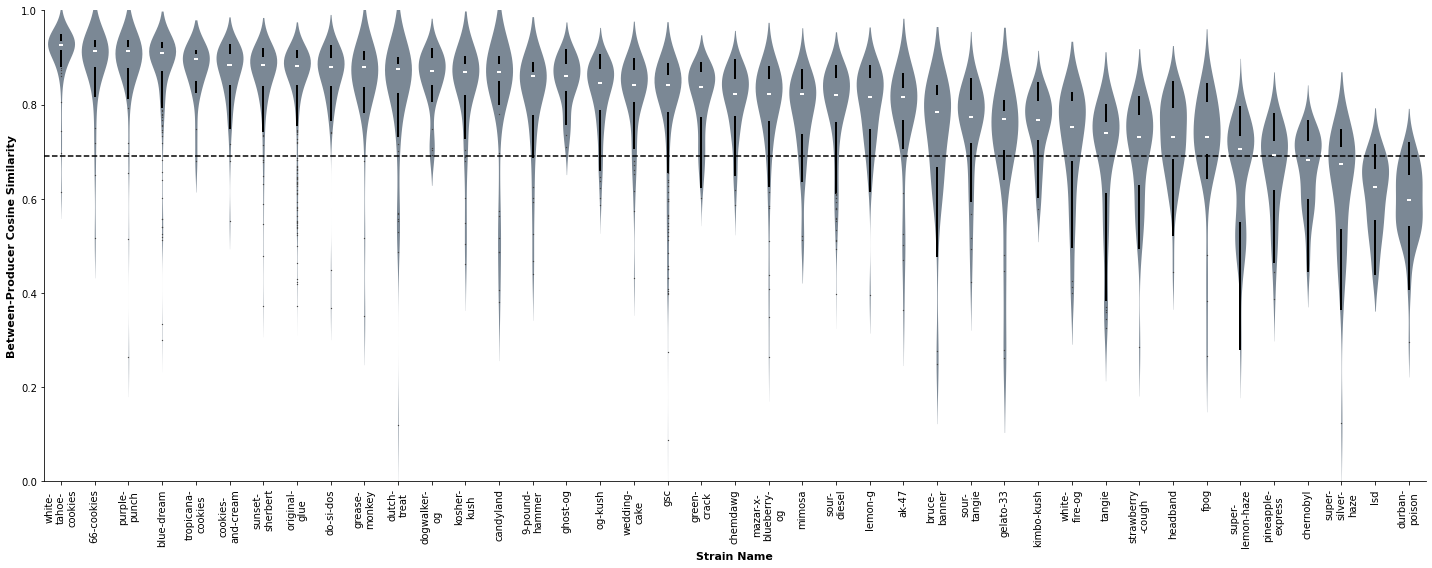

In [120]:
violin_props = {'x': 'strain_slug', 'y': 'value', 
                'ylims':(0,1),
             'save_name': 'fig8/8C_violin-plot_bw_prod',
             'x_label': 'Strain Name', 'y_label': 'Between-Producer Cosine Similarity',
             'avg': False, 'sig_comp': False, 'v_xticklabels': True,
             'axhline': np.mean(bs_avgs), 'title': '',
             'figsize':(20,8),'sample_frac':1}

run_graph(melt_df.loc[melt_df['strain_slug'].isin(weights_terps[weights_terps >= 15].index)],
          **violin_props)

### 8D: Strain Comparison

In [153]:
# purple-punch vs white-fire-og
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'pinene': '#00af66',
             'humulene': '#97d700', 'other': '#8a8a8a'}

terp_order = ['humulene', 'pinene', 'limonene', 'terpinolene', 'caryophyllene',
             'linalool', 'myrcene', 'tot_ocimene']

In [154]:
X_terp_norm = normalize(fin_prod_df, common_terps)
X_terp_norm['pinene'] = X_terp_norm['a_pinene']+X_terp_norm['b_pinene']

In [155]:
X_terp_norm = get_kmeans(fin_prod_df, common_terps)
pal_dict = get_pal_dict(X_terp_norm, common_terps, terp_dict)

In [125]:
data

anon_producer strain_slug    tot_thc   tot_cbd   tot_cbg   tot_cbc  \
5542          2216      tangie  16.444500  0.052620       NaN       NaN   
3511          1717      tangie   6.542737  0.032449  0.353501  0.000000   
9020          3113      tangie   6.361780       NaN  0.174010       NaN   
7819          2776      tangie  17.184840  0.296789  0.581773  0.000000   
1988          1396      tangie  22.397460  0.078930       NaN       NaN   
...            ...         ...        ...       ...       ...       ...   
4849          2048      tangie  16.324071  0.128963  0.926950  0.002759   
4831          2047      tangie  13.469513  0.131988  0.590464  0.000000   
9552          3256      tangie  25.635225  0.057005  0.834220  0.060000   
3218          1636      tangie  15.894909  0.046379  0.955151  0.001214   
4096          1873      tangie  17.184230  0.061390       NaN       NaN   

       tot_cbn  tot_thcv  tot_ocimene  camphene  g_terpinene  \
5542  0.000000       NaN     0.000000  0.445633     0.000000   
3511  0.000000  0.000000     6.666667  0.000000     0.000000   
9020       NaN       NaN     2.988048  0.000000     0.000000   
7819  0.040210       NaN     0.000000  0.843647     0.843647   
1988  0.000000       NaN     0.155039  1.240310     0.000000   
...        ...       ...          ...       ...          ...   
4849  0.003973  0.106054     9.424316  0.451198     1.071769   
4831  0.004030  0.085258    11.921646  0.429351     1.024002   
9552  0.000000  0.015000     1.382488  0.000000     2.764977   
3218  0.001129  0.257291    11.922149  0.461489     1.174510   
4096  0.000000       NaN     0.000000  0.000000     0.000000   

      tot_nerolidol_ct   humulene  caryophyllene   limonene   linalool  \
5542         26.827094   5.614973      17.647059  15.240642  10.962567   
3511          8.000000   9.333333      33.333333   4.000000   6.666667   
9020         12.350598  10.358566      38.446215   7.968127   6.772908   
7819          0.000000   9.339171      23.731788  23.191854  11.600145   
1988          1.395349  11.472868      38.604651  32.558140   2.480620   
...                ...        ...            ...        ...        ...   
4849          0.000000   3.481133      10.168967   1.035500   0.807298   
4831          0.000000   3.270653       9.159488   0.985933   0.525383   
9552          0.000000   3.225806       9.677419   6.451613   5.069124   
3218          0.000000   3.495402      10.810149   1.016220   0.899331   
4096          1.398881   1.438849      17.945643   5.475620   5.355715   

        myrcene  bisabolol  b_pinene  a_terpinene  terpinolene  a_pinene  \
5542   3.030303  16.131907  2.584670     0.000000     0.000000  1.515152   
3511  28.000000   0.000000  4.000000     0.000000     0.000000  0.000000   
9020  18.725100   0.000000  1.593625     0.000000     0.000000  0.796813   
7819  20.374073   0.843647  4.990172     0.843647     0.843647  2.554563   
1988   3.255814   0.000000  5.271318     0.000000     0.310078  3.255814   
...         ...        ...       ...          ...          ...       ...   
4849   8.614415   0.000000  5.312824     2.341858    53.808859  3.481862   
4831   7.921526   0.429351  4.956142     2.340822    54.012357  3.023347   
9552  15.668203   4.608295  5.069124     2.764977    39.631336  3.686636   
3218   8.547943   0.000000  4.882329     1.793751    52.016787  2.979941   
4096  20.543565   4.316547  4.236611     1.159073    35.731415  2.398082   

      chemotype_ratio chemotype  n_prod  n_samps strain_sort    pinene  \
5542       312.514253   THC-Dom      72        1           6  4.099822   
3511       201.631391   THC-Dom      72        1           6  4.000000   
9020              inf   THC-Dom      72        1           6  2.390438   
7819        57.902589   THC-Dom      72        1           6  7.544734   
1988       283.763588   THC-Dom      72        1           6  8.527132   
...               ...       ...     ...      ...         ...       ...   
4849       126.

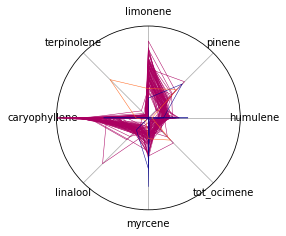

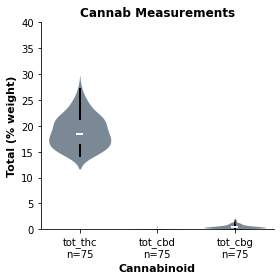

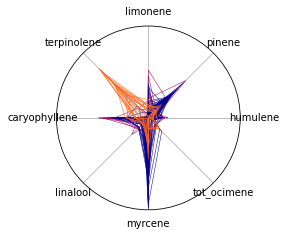

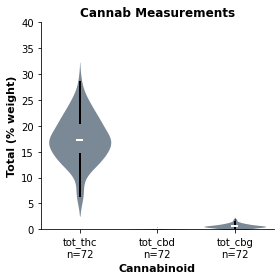

In [156]:
for strain in ['purple-punch','tangie']:
    data = X_terp_norm.loc[X_terp_norm['strain_slug']==strain].sort_values('kmeans_label')
    colors = data['kmeans_label'].replace(pal_dict)
    
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.add_subplot(polar=True)

    ax1 = run_polar_plot(data, ax1,
                        **{'cols': terp_order,
                        'colors': colors,
                          'avg': False})
    plt.tight_layout()
    plt.savefig('viz/fig8/8D_{}_polar-plot.pdf'.format(strain))

    ## bar plot
    bar_df = pd.melt(data[['tot_thc','tot_cbd', 'tot_cbg']], var_name='cannab')
    
    violin_props = {'x': 'cannab', 'y': 'value', 'ylims':(0,40),
                    'order': ['tot_thc','tot_cbd','tot_cbg'],
                 'title': 'Cannab Measurements', 'save_name': 'fig8/8D_{}_violin-plot'.format(strain),
                 'x_label': 'Cannabinoid', 'y_label': 'Total (% weight)',
                 'avg': False, 'sig_comp': False, 'figsize':(10,8), 'sample_frac':1, 'figsize':(4,4)}

    run_graph(bar_df,
              **violin_props)

### 8E: UMap of Producer Kmeans

In [157]:
df_norm = get_kmeans(fin_prod_df, common_terps)
pal_dict = get_pal_dict(df_norm, common_terps, terp_dict)

In [158]:
df_norm = get_umap(df_norm, common_terps,
                    n_neighbors=15, random_state=56)

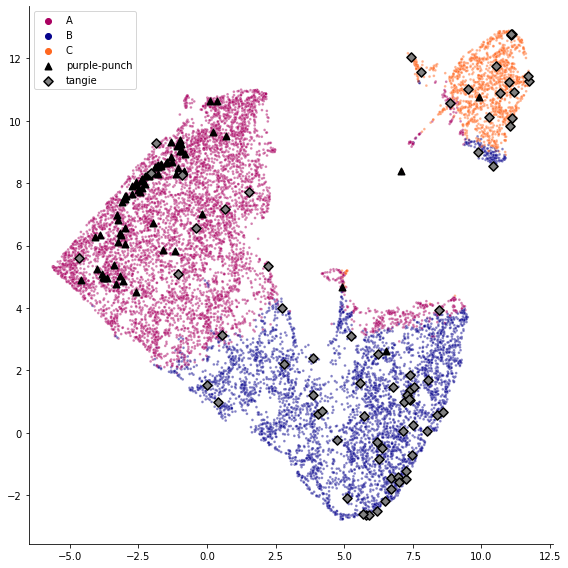

In [159]:
scatter_props = {'x': 'umap_0', 'y': 'umap_1',
             'x_label': '', 'y_label': '',
             'hue': 'kmeans_label',
             'palette': pal_dict,
             'size': 7,
             'title': '', 'save_name': 'fig8/8E_scatter_terps_umap_kmeans3_allprods',
             'figsize':(8,8), 'sample_frac':1, 'n_display': 5,
             'prod_strains': ['purple-punch','tangie']}

run_graph(df_norm,
          **scatter_props)

In [92]:
get_round(df_norm.loc[df_norm['strain_slug']=='purple-punch', 'kmeans_label'].value_counts()/df_norm.loc[df_norm['strain_slug']=='purple-punch'].shape[0])

A    96.0
B     2.7
C     1.3
Name: kmeans_label, dtype: float64

In [94]:
get_round(df_norm.loc[df_norm['strain_slug']=='tangie', 'kmeans_label'].value_counts()/df_norm.loc[df_norm['strain_slug']=='tangie'].shape[0])

B    62.5
C    20.8
A    16.7
Name: kmeans_label, dtype: float64

## Figure 9: ISH and Strain Names Variation

In [24]:
# purple-punch vs white-fire-og
terp_dict = {'tot_nerolidol_ct': '#00f6fa', 'caryophyllene': '#aa0061',
             'linalool': '#5c068c', 'terpinolene': '#ff671f',
             'g_terpinene': '#c27d5d', 'a_terpinene': '#8a5942',
             'camphene': '#93a168', 'bisabolol': '#af91b3',
             'limonene': '#eedc00', 'myrcene': '#06038d',
             'tot_ocimene': '#e0004d', 'pinene': '#00af66',
             'humulene': '#97d700', 'other': '#8a8a8a'}

terp_order = ['humulene', 'pinene', 'limonene', 'terpinolene', 'caryophyllene',
             'linalool', 'myrcene', 'tot_ocimene']

chemotypes = ['None', 'Indica', 'Hybrid', 'Sativa']
ish_dict = {'Indica': 'purple', 'Sativa': 'red', 'Hybrid': 'limegreen', 'None':'#8a8a8a'}


In [39]:
fin_prod_df = get_prod_df(terp_df.loc[thc_bool],
                           1, 1,
                           common_cannabs, common_terps)

In [40]:
df_norm = get_kmeans(fin_prod_df, common_terps)

pal_dict = get_pal_dict(df_norm, common_terps, terp_dict)

In [41]:
df_norm = get_umap(df_norm, common_terps,
                    n_neighbors=15, random_state=56)

### 9A: UMap of Producer Kmeans, ISH

In [42]:
df_norm = df_norm.merge(strain_info[['strain_slug','strain_category','strain_popularity']], on='strain_slug', how='left')
df_norm.loc[pd.isnull(df_norm['strain_category']), 'strain_category'] = 'None'


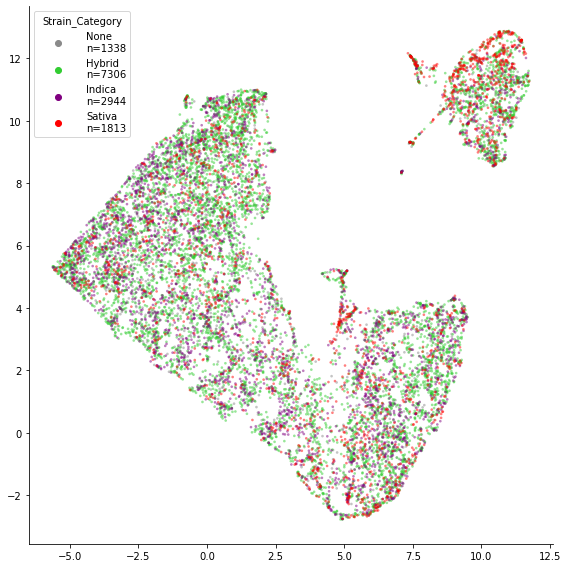

In [29]:
scatter_props = {'x': 'umap_0', 'y': 'umap_1',
             'x_label': '', 'y_label': '',
             'hue': 'strain_category',
             'sort_list': ['None','Hybrid','Indica','Sativa'],
             'palette': ish_dict,
             'size': 7, 'edgecolor': 'None',
             'title': '', 'save_name': 'fig9/9A_scatter_terps_umap_ish_allprods',
             'figsize':(8,8), 'sample_frac':1, 'n_display': 5}

run_graph(df_norm,
          **scatter_props)

### 9B: Bar Chart of ISH Breakdown per Cluster

In [64]:
sub_df_norm = df_norm.loc[df_norm['strain_category']!='None', :].copy()
group_counts = sub_df_norm.groupby('kmeans_label')['strain_category'].apply(lambda x: x.value_counts()/x.shape[0])

totals = pd.pivot(group_counts.reset_index(drop=False), index='kmeans_label', columns='level_1')
totals = totals.fillna(0).apply(lambda x: x*100, axis=1)
totals.columns = ['Hybrid','Indica','Sativa']

totals.loc['overall'] = (sub_df_norm['strain_category'].value_counts()/sub_df_norm.shape[0]*100).values

In [52]:
totals

Hybrid     Indica     Sativa
kmeans_label                                 
A             64.079681  24.828685  11.091633
B             57.054795  27.374429  15.570776
C             55.823864  13.281250  30.894886
overall       60.565365  24.405206  15.029429

In [48]:
sub_df_norm = df_norm.loc[df_norm['strain_category']!='None', :].copy()
group_counts = sub_df_norm.groupby('kmeans_label')['strain_category'].apply(lambda x: x.value_counts())

totals = pd.pivot(group_counts.reset_index(drop=False), index='kmeans_label', columns='level_1')
totals = totals.fillna(0)
totals.columns = ['Hybrid','Indica','Sativa']

totals.loc['overall'] = (sub_df_norm['strain_category'].value_counts()).values

In [49]:
totals

Hybrid  Indica  Sativa
kmeans_label                        
A               4021    1558     696
B               2499    1199     682
C                786     187     435
overall         7306    2944    1813

In [36]:
0.05/3

0.016666666666666666

In [53]:
totals.apply(lambda x: scs.chisquare(x, totals.loc['overall']), axis=1)

kmeans_label
A             (1.2429916922154565, 0.5371403570418384)
B               (0.584229411328301, 0.746682882305046)
C          (22.18951872514687, 1.5191729917214758e-05)
overall                                     (0.0, 1.0)
dtype: object

In [54]:
1.519e-05<(0.0001/3)

True

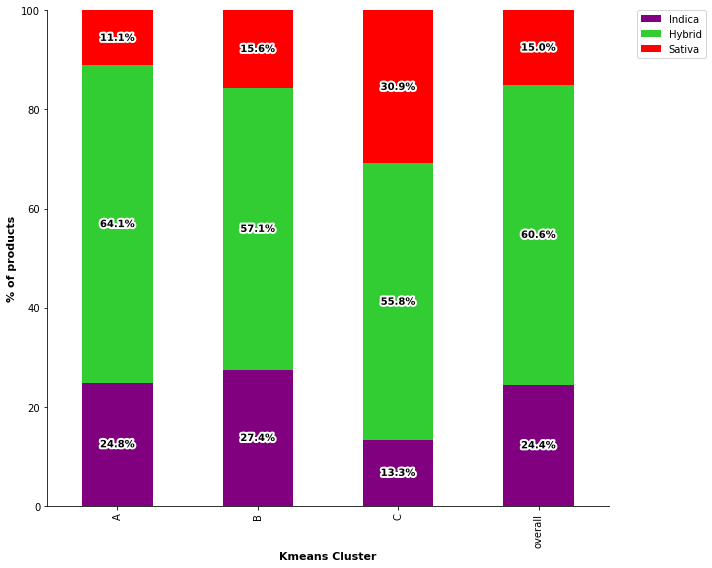

In [65]:
bar_props = {'order': ['Indica','Hybrid','Sativa'],
            'title': '', 'save_name': 'fig9/9B_stacked_groups',
             'x_label': 'Kmeans Cluster', 'y_label': '% of products',
             'ylims':(0,100),
             'figsize':(10,8), 'palette': ish_dict}

run_graph(totals,
          **bar_props)

### 9C: Umap of Producer Kmeans, top strains

In [66]:
df_norm.groupby('kmeans_label').apply(lambda x: x['strain_slug'].value_counts(ascending=False).index[0])

kmeans_label
A    original-glue
B       blue-dream
C      dutch-treat
dtype: object

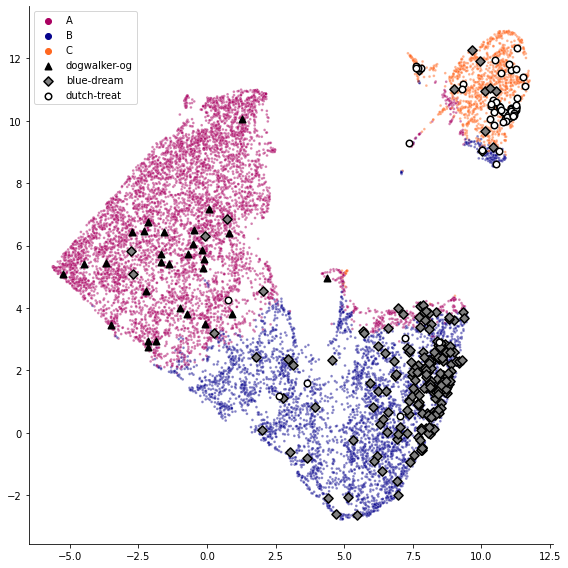

In [67]:
scatter_props = {'x': 'umap_0', 'y': 'umap_1',
             'x_label': '', 'y_label': '',
             'hue': 'kmeans_label',
             'palette': pal_dict,
             'size': 7,
             'title': '', 'save_name': 'fig9/9C_scatter_terps_umap_kmeans3_top_strains',
             'figsize':(8,8), 'sample_frac':1, 'n_display': 5,
             'prod_strains': ['dogwalker-og','blue-dream', 'dutch-treat']}

run_graph(df_norm,
          **scatter_props)

### 9D: Bar Chart of ISH Breakdown per Cluster

In [68]:
def get_rel_df(df, groupby='strain_slug'):
    rel_df = pd.concat([df.groupby(groupby)['kmeans_label'].apply(lambda x:(x.value_counts())[0]), df.groupby(groupby)['kmeans_label'].apply(lambda x:x.shape[0])], axis=1)
    rel_df.columns = ['n_in_cluster', 'n_prods']
    rel_df['%_in_cluster'] = rel_df['n_in_cluster']/rel_df['n_prods']*100
    rel_df['top_cluster'] = df.groupby(groupby)['kmeans_label'].apply(lambda x: x.value_counts().index[0])
    rel_df['weighted_rel'] = rel_df['%_in_cluster']*rel_df['n_prods']
    
    return rel_df

In [69]:
def get_full_rel_df(df, common_terps,
                   groupby='strain_slug'):
    bw_prod_df_terps, avgs_terps, weights_terps = run_all_cos_sims(df[common_terps+[groupby]],
                                                                    common_terps, groupby=groupby)
    bw_prod_df_terps['bw_prod_sim'] = bw_prod_df_terps['bw_prod_sim'].astype(float)

    rel_df = get_rel_df(df, groupby=groupby).join(bw_prod_df_terps.groupby(groupby)['bw_prod_sim'].mean())
    
    return rel_df

In [70]:
# use list of strains obtained by the five-samp, five-prod threshold, but use full product dataset for analysis
n_samp_df = terp_df.loc[thc_bool].groupby(['anon_producer','strain_slug'])['u_id'].count()
samp_df = n_samp_df[n_samp_df>=5]
strains_5s5p = samp_df.groupby('strain_slug').count()[samp_df.groupby('strain_slug').count()>=5].index

In [71]:
sub_df_norm = df_norm.loc[df_norm['strain_slug'].isin(strains_5s5p), :].copy()
rel_df = get_full_rel_df(sub_df_norm, common_terps)

col = '%_in_cluster'

top_5_per_clust = rel_df.loc[strains_5s5p].groupby('top_cluster')[col].apply(lambda x: x.sort_values(ascending=False)[:7].index).explode()
top_5_per_clust_df = rel_df.loc[top_5_per_clust.values].sort_values(['top_cluster',col], ascending=[True,False]).reset_index(drop=False)

runs = 200
bs_avgs = []
bs_avgs2 = []

for run in tqdm(range(runs)):
    sub_df_norm['strain_slug_rand'] = sub_df_norm['strain_slug'].sample(frac=1).values
    rel_df_bs = get_full_rel_df(sub_df_norm, common_terps, 'strain_slug_rand')
    bs_avgs.append(np.average(rel_df_bs['%_in_cluster'], weights=rel_df_bs['n_prods']))
#     bs_avgs.append(np.mean(rel_df_bs['%_in_cluster']))
    bs_avgs2.append(rel_df_bs['n_in_cluster'].sum()/rel_df_bs['n_prods'].sum()*100)

100%|██████████| 200/200 [00:15<00:00, 13.10it/s]


In [72]:
top_cluster_dict = sub_df_norm.groupby('strain_slug')['kmeans_label'].apply(lambda x: x.value_counts().index[0]).to_dict()
sub_df_norm['top_cluster'] = sub_df_norm['strain_slug'].replace(top_cluster_dict)

In [73]:
sub_df_norm['in_top_cluster'] = sub_df_norm['kmeans_label']==sub_df_norm['top_cluster']

In [74]:
melt_df = pd.melt(sub_df_norm[['strain_slug','in_top_cluster']], value_vars='in_top_cluster', id_vars='strain_slug')
melt_df['value'] = melt_df['value'].astype(float)

In [60]:
melt_df

strain_slug        variable  value
0         original-glue  in_top_cluster    1.0
1         original-glue  in_top_cluster    1.0
2         original-glue  in_top_cluster    1.0
3         original-glue  in_top_cluster    1.0
4         original-glue  in_top_cluster    1.0
...                 ...             ...    ...
2965  tropicana-cookies  in_top_cluster    1.0
2966  tropicana-cookies  in_top_cluster    1.0
2967  tropicana-cookies  in_top_cluster    1.0
2968  tropicana-cookies  in_top_cluster    1.0
2969  tropicana-cookies  in_top_cluster    1.0

[2970 rows x 3 columns]

In [77]:
ttest_df = pd.DataFrame(index=strains_5s5p, columns=['t', 'p_val', 'd_prime'])
for strain in strains_5s5p:
    ttest_df.loc[strain] = ttest_region(strain, melt_df, np.array(bs_avgs)/100, col='strain_slug')
ttest_df['rej'] = ttest_df['p_val'] <= (0.05/len(strains_5s5p))
# ttest_df['d_prime_abs'] = np.abs(ttest_df['d_prime'])

In [78]:
bins = np.array([0, 0.0001, 0.001, 0.01, np.inf])/len(strains_5s5p)
names = ['***', '**', '*', 'n.s.']
ttest_df['star'] = pd.cut(ttest_df['p_val'].values, bins, labels=names)
ttest_df['star'] = ttest_df['star'].fillna('***')

In [79]:
bins

array([0.00000000e+00, 2.43902439e-06, 2.43902439e-05, 2.43902439e-04,
                  inf])

In [63]:
labels = top_5_per_clust_df['strain_slug']
ttest_df.loc[labels].to_csv('viz/fig9/9d_ttest.csv', index=True)

In [23]:
ttest_df.loc[labels]

t        p_val     d_prime    rej  star
strain_slug                                                          
dogwalker-og            10976.1            0     1100.36   True   ***
grease-monkey           14.2642  4.62083e-17     3.23018   True   ***
white-tahoe-cookies     12.7427  1.78863e-17     2.52343   True   ***
purple-punch            14.9959  3.92677e-24     2.46531   True   ***
tropicana-cookies       7.01369  8.35819e-07     2.21792   True   ***
cookies-and-cream       12.1282  6.69342e-18     2.19607   True   ***
66-cookies              8.96144  8.34438e-11     2.08349   True   ***
blue-dream              12.3403  7.41339e-27     1.18471   True   ***
9-pound-hammer          3.80644  0.000361911    0.732549   True     *
ak-47                   2.26805    0.0296043    0.542167  False  n.s.
green-crack            0.679698     0.498236   0.0951767  False  n.s.
sour-tangie            0.166242     0.868872   0.0386504  False  n.s.
tangie                 0.114949      0.90881   0.0192926  False  n.s.
mimosa              -0.00884878     0.992993 -0.00217842  False  n.s.
dutch-treat             5.50209  7.30893e-07    0.980329   True   ***
super-lemon-haze        0.90405     0.369413    0.161078  False  n.s.
durban-poison         -0.546278     0.586935   -0.100578  False  n.s.
chernobyl              -1.25598     0.215906   -0.270871  False  n.s.

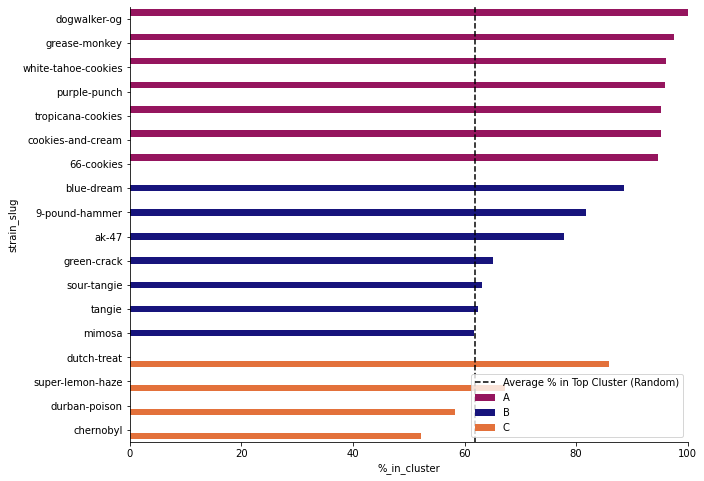

In [80]:
labels = top_5_per_clust_df['strain_slug']
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=col, y='strain_slug',
                hue='top_cluster',
                order=labels,
                data=top_5_per_clust_df,
                palette=pal_dict,
                ax=ax)
ax.axvline(np.mean(bs_avgs), linestyle='--', label='Average % in Top Cluster (Random)', color='black')
# ax.axvline(np.average(rel_df['%_in_cluster'], weights=rel_df['n_prods']),
#             linestyle='-.', label='Average % in Top Cluster (Population)', color='black')
ax.legend()
ax.set_xlim(0,100)
simple_axis(ax)
plt.savefig('viz/fig9/9D_bar_{}.pdf'.format(col))